# Clustering Application on Forex Markets


## Preparing Data

### FX daily data

FX: 29 most widely traded currencies pairs (G10 + 19 EM currencies) FX spot daily (base currency: USD), plus the gold and silver prices in USD,
Time frame: January 2017 to September 2021.
Pegged currencies, such as Hong Kong dollar, are not included (as that would be pointless for the purposes of this exercise).

The sample size is 31. There were a total of 1080 trading days in the sample period. Forward filling to fill missing data due to various holidays.


In [389]:
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()
import pandas as pd
import numpy as np
import seaborn as sns

In [390]:
# Fetch daily FX from 2017.01.01 to 2019.12.31 from Yahoo finance by Python API
# Create list to store tickers, and start and end point of time period
fx_list=['CNY=X','TWD=X','KRW=X','SGD=X','MYR=X','IDR=X','THB=X','PHP=X','INR=X',
         'RUB=X','PLN=X','HUF=X','RON=X', 'TRY=X','BRL=X','MXN=X','CLP=X','COP=X','ZAR=X','ILS=X',
         'EUR=X','GBP=X','JPY=X','AUD=X','NZD=X','CAD=X','CHF=X','NOK=X','SEK=X']

start_date= '2017-01-01'
end_date='2020-12-31'

# Below is the code for fetching from Yahoo and then save to csv file - raw_fx.csv.
# To save time, it is need to run only once.
'''
# Create a DF to store
df = yf.download(fx_list, start=start_date, end=end_date)#,progress=False)
df = df.iloc[:,[4]]

for i in fx_list[0:]:
    #print(i)
    temp_set = yf.download(i, start=start_date, end=end_date)
    temp_set = temp_set.iloc[:,[4]]
    temp_set.columns = [i]
    df = df.merge(temp_set,how='inner',on='Date',copy=False)

df # containing all FX data (2017-01-01 / 2020-12-31)

df.to_csv("raw_fx.csv")
'''

'\n# Create a DF to store\ndf = yf.download(fx_list, start=start_date, end=end_date)#,progress=False)\ndf = df.iloc[:,[4]]\n\nfor i in fx_list[0:]:\n    #print(i)\n    temp_set = yf.download(i, start=start_date, end=end_date)\n    temp_set = temp_set.iloc[:,[4]]\n    temp_set.columns = [i]\n    df = df.merge(temp_set,how=\'inner\',on=\'Date\',copy=False)\n\ndf # containing all FX data (2017-01-01 / 2020-12-31)\n\ndf.to_csv("raw_fx.csv")\n'

In [391]:
# Check if there are NAs in it and Dtype.

df = pd.read_csv('raw_fx.csv')
df.info()
np.sum(df.isna())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    1018 non-null   object 
 1   ('Adj Close', 'CLP=X')  1018 non-null   float64
 2   CNY=X                   1018 non-null   float64
 3   TWD=X                   1018 non-null   float64
 4   KRW=X                   1018 non-null   float64
 5   SGD=X                   1018 non-null   float64
 6   MYR=X                   1018 non-null   float64
 7   IDR=X                   1018 non-null   float64
 8   THB=X                   1018 non-null   float64
 9   PHP=X                   1018 non-null   float64
 10  INR=X                   1018 non-null   float64
 11  RUB=X                   1018 non-null   float64
 12  PLN=X                   1018 non-null   float64
 13  HUF=X                   1018 non-null   float64
 14  RON=X                   1018 non-null   

,Date,"('Adj Close', 'CLP=X')",CNY=X,TWD=X,KRW=X,SGD=X,MYR=X,IDR=X,THB=X,PHP=X,...,ILS=X,EUR=X,GBP=X,JPY=X,AUD=X,NZD=X,CAD=X,CHF=X,NOK=X,SEK=X
0,2017-01-02,668.599976,6.9438,32.439999,1205.449951,1.44699,4.4835,13512.000000,35.764999,49.596001,...,3.80016,0.94994,0.809780,116.794998,1.387000,1.442100,1.34340,1.01869,8.63220,9.08181
1,2017-01-03,656.979980,6.9440,32.264000,1202.930054,1.45130,4.4900,13506.000000,35.799000,49.605000,...,3.84426,0.95602,0.814200,117.495003,1.389500,1.442600,1.34414,1.02419,8.65447,9.12140
2,2017-01-04,656.409973,6.9598,32.227001,1206.010010,1.44875,4.4950,13443.000000,35.889999,49.632999,...,3.85426,0.95970,0.816620,117.658997,1.383140,1.444300,1.34218,1.02610,8.64025,9.15175
3,2017-01-05,656.150024,6.9251,32.229000,1194.479980,1.43848,4.4710,13348.000000,35.786999,49.560001,...,3.85576,0.95230,0.811240,117.112999,1.372300,1.436100,1.32990,1.02012,8.58194,9.09388
4,2017-01-06,649.650024,6.8879,31.943001,1180.630005,1.42846,4.4705,13319.000000,35.655998,49.147999,...,3.84556,0.94287,0.804800,115.264999,1.362700,1.424200,1.32294,1.00979,8.47981,8.99680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,2020-12-24,713.599976,6.5396,28.135000,1104.800049,1.33191,4.0610,14146.901367,30.190001,47.926598,...,3.21445,0.82025,0.740450,103.552002,1.319331,1.409086,1.28455,0.88790,8.63390,8.28791
1014,2020-12-25,714.299988,6.5290,28.114000,1099.910034,1.32738,4.0590,14148.643555,30.020000,48.049999,...,3.21290,0.82070,0.737898,103.653000,1.314613,1.401051,1.28482,0.89090,8.56852,8.20771
1015,2020-12-28,714.299988,6.5408,27.938999,1099.089966,1.32862,4.0580,13911.143555,30.065001,48.005001,...,3.22115,0.81933,0.736790,103.532997,1.313730,1.405360,1.28396,0.88943,8.61542,8.25645
1016,2020-12-29,711.500000,6.5356,28.107000,1095.000000,1.32930,4.0475,14126.120117,30.139999,47.904972,...,3.22086,0.81810,0.742610,103.689003,1.317710,1.406866,1.28400,0.88830,8.62814,8.26051


In [392]:
# Drop the first col as it is duplicated :
# run for once only
df.drop(df.iloc[:,1].name,axis=1, inplace = True)

In [393]:
# Check dataframe after drop the duplicated column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1018 non-null   object 
 1   CNY=X   1018 non-null   float64
 2   TWD=X   1018 non-null   float64
 3   KRW=X   1018 non-null   float64
 4   SGD=X   1018 non-null   float64
 5   MYR=X   1018 non-null   float64
 6   IDR=X   1018 non-null   float64
 7   THB=X   1018 non-null   float64
 8   PHP=X   1018 non-null   float64
 9   INR=X   1018 non-null   float64
 10  RUB=X   1018 non-null   float64
 11  PLN=X   1018 non-null   float64
 12  HUF=X   1018 non-null   float64
 13  RON=X   1018 non-null   float64
 14  TRY=X   1018 non-null   float64
 15  BRL=X   1018 non-null   float64
 16  MXN=X   1018 non-null   float64
 17  CLP=X   1018 non-null   float64
 18  COP=X   1018 non-null   float64
 19  ZAR=X   1018 non-null   float64
 20  ILS=X   1018 non-null   float64
 21  EUR=X   1018 non-null   float64
 22  

Rename columns

In [394]:
# Modifying other col names
ss = df.columns.to_list()
ncol_new = [e.replace('=X','') for e in ss]
df.columns = ncol_new

df.columns

Index(['Date', 'CNY', 'TWD', 'KRW', 'SGD', 'MYR', 'IDR', 'THB', 'PHP', 'INR',
       'RUB', 'PLN', 'HUF', 'RON', 'TRY', 'BRL', 'MXN', 'CLP', 'COP', 'ZAR',
       'ILS', 'EUR', 'GBP', 'JPY', 'AUD', 'NZD', 'CAD', 'CHF', 'NOK', 'SEK'],
      dtype='object')

In [395]:
# Save cleaned foreign currencies exchange rates to csv file - fx_cleaned.csv.
df.to_csv('fx_cleaned.csv')

Load the cleaned fx data from file. There are total 29 currencies in df.

In [396]:
df = pd.read_csv('fx_cleaned.csv',index_col=0)
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018 entries, 0 to 1017
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1018 non-null   datetime64[ns]
 1   CNY     1018 non-null   float64       
 2   TWD     1018 non-null   float64       
 3   KRW     1018 non-null   float64       
 4   SGD     1018 non-null   float64       
 5   MYR     1018 non-null   float64       
 6   IDR     1018 non-null   float64       
 7   THB     1018 non-null   float64       
 8   PHP     1018 non-null   float64       
 9   INR     1018 non-null   float64       
 10  RUB     1018 non-null   float64       
 11  PLN     1018 non-null   float64       
 12  HUF     1018 non-null   float64       
 13  RON     1018 non-null   float64       
 14  TRY     1018 non-null   float64       
 15  BRL     1018 non-null   float64       
 16  MXN     1018 non-null   float64       
 17  CLP     1018 non-null   float64       
 18  COP     

### Prepare other financial data

Prepare prices of other trading financial products - USD (FED broader usd index), MSCI_ACWI, VIX index, Metal price (Gold and Silver), Crude Oil

In [397]:
import quandl

# Fetch Daily GOLD price from LBMA
# The LBMA Gold price is set twice daily at 10:30 and 15:00 in an auction independently operated and administered by ICE Benchmark Administration(IBA).
# The price is set in US dollars per fine troy ounce.
# For consistency, taking average of AM and PM as GOLD price for this project.
gold_set = quandl.get("LBMA/GOLD", authtoken="eHyj6vZv1y253X1rpN4K", start_date=start_date, end_date = end_date)
gold = gold_set.iloc[:,[0,1]]
gold['GOLD_USD'] = gold.apply(np.average,axis=1).round(2)

# Silver price
silver = quandl.get("LBMA/SILVER", authtoken="eHyj6vZv1y253X1rpN4K", start_date=start_date, end_date = end_date)
silver['SILVER_USD'] = silver['USD']

<ipython-input-397-d12b61eb76e6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold['GOLD_USD'] = gold.apply(np.average,axis=1).round(2)


In [398]:
# Add Metal, Oul, USD, VIXCDataset
# Combine gold and silver into one df - "metal"
metal = pd.DataFrame.merge(gold['GOLD_USD'],silver['SILVER_USD'],how='inner',on='Date', copy=False)
metal = metal.reset_index()

metal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1012 non-null   datetime64[ns]
 1   GOLD_USD    1004 non-null   float64       
 2   SILVER_USD  1012 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 23.8 KB


Prepare df of 'MSCI All-Country World Index'

In [399]:
# MSCI ACWI is the global equity index
acwi = pd.read_csv('msci_acwi.csv')
acwi['Date'] = pd.to_datetime(acwi['Date'])
acwi.rename(columns={'DATE': 'Date'},inplace=True)
acwi.info()
#acwi.drop(acwi.iloc[:,2:4],inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1044 non-null   datetime64[ns]
 1   ACWI    1044 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 16.4 KB


In [400]:
# Crude Oil
# Crude oil price (Cushing, OK WTI Spot Price FOB (Dollars per Barrel)) from EIA Brent EU
crude_oil = pd.read_csv('DCOILBRENTEU.csv')
crude_oil['DATE'] = pd.to_datetime(crude_oil['DATE'])
crude_oil.rename(columns={'DATE': 'Date','DCOILBRENTEU':'CRUDE OIL'},inplace=True)

About Broad Dollar Index:

https://www.federalreserve.gov/econres/notes/feds-notes/revisions-to-the-federal-reserve-dollar-indexes-20190115.htm


The Federal Reserve dollar indexes are designed to help estimate the overall effects of U.S. dollar exchange rate movements on U.S. international trade.
There are three indexes: the broad dollar index, which is constructed using the currencies of the most important U.S. trading partners by volume of bilateral trade,
and two sub-indexes, which split the currencies in the broad index into advanced foreign economies (AFE) and emerging market economies (EME)


Consistent with market practice, daily changes in the indexes are computed using geometrically-weighted averages of changes in bilateral exchange rates.

The weights are computed using annual bilateral trade data published by the Bureau of Economic Analysis (BEA)

In [401]:
# Fed nominal broad trade-weighted US dollar exchange rate
usd1 = pd.read_csv('DTWEXBGS.csv')
usd1['DATE'] = pd.to_datetime(usd1['DATE'])
usd = usd1.copy()
usd.rename(columns={'DATE': 'Date','DTWEXBGS':'USD'},inplace=True)

In [402]:
'''
# Global Sovereign Index - LEGATRUU (Bloomberg Barclays Global-Aggregate Total Return Index Value Unhedged USD)
# As a proxy of global investment grade debt from twenty-four local currency markets.
# This multi-currency benchmark includes treasury, government-related, corporate and securitized fixed-rate bonds from both developed and emerging markets issuers.

bond = pd.read_csv('LEGATRUU.csv')
bond['Date'] = pd.to_datetime(bond['Date'])
bond.rename(columns={'Date': 'Date','Last Price':'BOND'},inplace=True)

bond.info()
bond.isnull().sum().sum() # check na

'''

"\n# Global Sovereign Index - LEGATRUU (Bloomberg Barclays Global-Aggregate Total Return Index Value Unhedged USD)\n# As a proxy of global investment grade debt from twenty-four local currency markets.\n# This multi-currency benchmark includes treasury, government-related, corporate and securitized fixed-rate bonds from both developed and emerging markets issuers.\n\nbond = pd.read_csv('LEGATRUU.csv')\nbond['Date'] = pd.to_datetime(bond['Date'])\nbond.rename(columns={'Date': 'Date','Last Price':'BOND'},inplace=True)\n\nbond.info()\nbond.isnull().sum().sum() # check na\n\n"

In [403]:
# VIX Index - VIXCLS
# The Cboe Volatility Index, or VIX, is a real-time market index representing the market's expectations for volatility over the coming 30 days.
# Investors use the VIX to measure the level of risk, fear, or stress in the market when making investment decisions.
# Traders can also trade the VIX using a variety of options and exchange-traded products, or use VIX values to price derivatives.
vix = pd.read_csv('VIXCLS.csv')
vix['DATE'] = pd.to_datetime(vix['DATE'])
vix.rename(columns={'DATE': 'Date','VIXCLS':'VIX'},inplace=True)



Merging above dfs to FX dataframe

In [404]:
df.info() # NORMAL!!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018 entries, 0 to 1017
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1018 non-null   datetime64[ns]
 1   CNY     1018 non-null   float64       
 2   TWD     1018 non-null   float64       
 3   KRW     1018 non-null   float64       
 4   SGD     1018 non-null   float64       
 5   MYR     1018 non-null   float64       
 6   IDR     1018 non-null   float64       
 7   THB     1018 non-null   float64       
 8   PHP     1018 non-null   float64       
 9   INR     1018 non-null   float64       
 10  RUB     1018 non-null   float64       
 11  PLN     1018 non-null   float64       
 12  HUF     1018 non-null   float64       
 13  RON     1018 non-null   float64       
 14  TRY     1018 non-null   float64       
 15  BRL     1018 non-null   float64       
 16  MXN     1018 non-null   float64       
 17  CLP     1018 non-null   float64       
 18  COP     

In [405]:
dfs_merge = [df,usd,acwi,vix,metal,crude_oil]
#df1 = df1.set_index('Date')
# multi-combine with python reduce()
from functools import reduce
df1 = reduce(lambda x, y: pd.merge(x,y,on=['Date'], how='inner'), dfs_merge)
#df1 = df1.set_index('Date')

#df1.index = df1.index.to_timestamp() ???

# Check if NA and dtype
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 985
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        986 non-null    datetime64[ns]
 1   CNY         986 non-null    float64       
 2   TWD         986 non-null    float64       
 3   KRW         986 non-null    float64       
 4   SGD         986 non-null    float64       
 5   MYR         986 non-null    float64       
 6   IDR         986 non-null    float64       
 7   THB         986 non-null    float64       
 8   PHP         986 non-null    float64       
 9   INR         986 non-null    float64       
 10  RUB         986 non-null    float64       
 11  PLN         986 non-null    float64       
 12  HUF         986 non-null    float64       
 13  RON         986 non-null    float64       
 14  TRY         986 non-null    float64       
 15  BRL         986 non-null    float64       
 16  MXN         986 non-null  

The dtype of data in some cols are not numeric, and there are symbols among values.
Further data cleaning are as following.

In [406]:
#df1.apply(lambda x: 0 if x == '  .' else x)
df1 = df1.dropna()
list_0 = ['USD','VIX','CRUDE OIL','ACWI']
for i in list_0:
    df1[i] = pd.to_numeric(df1[i],errors='coerce')  #'coerce' to numeric, if not fill NA

In [407]:
df1.info()
df1 = df1.fillna(method='ffill')
df1.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 0 to 985
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        979 non-null    datetime64[ns]
 1   CNY         979 non-null    float64       
 2   TWD         979 non-null    float64       
 3   KRW         979 non-null    float64       
 4   SGD         979 non-null    float64       
 5   MYR         979 non-null    float64       
 6   IDR         979 non-null    float64       
 7   THB         979 non-null    float64       
 8   PHP         979 non-null    float64       
 9   INR         979 non-null    float64       
 10  RUB         979 non-null    float64       
 11  PLN         979 non-null    float64       
 12  HUF         979 non-null    float64       
 13  RON         979 non-null    float64       
 14  TRY         979 non-null    float64       
 15  BRL         979 non-null    float64       
 16  MXN         979 non-null  

0

In [408]:
# Save to file
df1.to_csv('data_set.csv')
df1


,Date,CNY,TWD,KRW,SGD,MYR,IDR,THB,PHP,INR,...,CAD,CHF,NOK,SEK,USD,ACWI,VIX,GOLD_USD,SILVER_USD,CRUDE OIL
0,2017-01-03,6.9440,32.264000,1202.930054,1.45130,4.4900,13506.000000,35.799000,49.605000,68.133904,...,1.34414,1.02419,8.65447,9.12140,119.0873,423.615,12.85,1149.82,15.950,55.05
1,2017-01-04,6.9598,32.227001,1206.010010,1.44875,4.4950,13443.000000,35.889999,49.632999,68.269798,...,1.34218,1.02610,8.64025,9.15175,118.8780,427.214,11.85,1165.08,16.420,54.57
2,2017-01-05,6.9251,32.229000,1194.479980,1.43848,4.4710,13348.000000,35.786999,49.560001,67.885498,...,1.32990,1.02012,8.58194,9.09388,117.9983,429.572,11.67,1174.88,16.590,54.99
3,2017-01-06,6.8879,31.943001,1180.630005,1.42846,4.4705,13319.000000,35.655998,49.147999,67.733002,...,1.32294,1.00979,8.47981,8.99680,118.3470,429.679,11.32,1176.92,16.450,55.90
4,2017-01-09,6.9175,32.041000,1201.099976,1.43897,4.4745,13351.000000,35.702000,49.553001,68.142601,...,1.32418,1.01742,8.53534,9.06181,118.4082,428.215,11.56,1177.30,16.520,54.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,2020-12-21,6.5360,28.169001,1098.979980,1.33128,4.0380,14068.937500,29.922001,47.955944,73.603600,...,1.28106,0.88548,8.63030,8.28354,112.1899,634.600,25.16,1874.62,26.155,50.61
981,2020-12-22,6.5482,28.139999,1101.859985,1.33258,4.0380,14100.731445,30.039000,48.160000,73.935303,...,1.28532,0.88548,8.63508,8.25111,112.4475,633.651,24.23,1875.20,25.770,49.88
982,2020-12-23,6.5422,28.130800,1107.979980,1.33491,4.0590,14324.200195,30.221001,48.230000,74.269997,...,1.28933,0.88786,8.72680,8.32661,112.2290,636.014,23.31,1871.05,25.315,51.05
984,2020-12-29,6.5356,28.107000,1095.000000,1.32930,4.0475,14126.120117,30.139999,47.904972,73.544899,...,1.28400,0.88830,8.62814,8.26051,111.7643,643.000,23.08,1874.10,26.150,50.44


In [409]:
# Fill missing data points by Forward-filling same as the article
'''
# It is noticed that the missing values are stored as '.' in original dataset, those replaced by NaN for forward filling
data_set2['USD'] = data_set2['USD'].replace('.',np.nan)
data_set2.fillna(method = "ffill", inplace=True)
np.sum(data_set2.isna())
data_set2

#map(lambda x: date.isoweekday(x), data_set2['Date'])

data_set2.to_csv('data_set2.csv')
'''

'\n# It is noticed that the missing values are stored as \'.\' in original dataset, those replaced by NaN for forward filling\ndata_set2[\'USD\'] = data_set2[\'USD\'].replace(\'.\',np.nan)\ndata_set2.fillna(method = "ffill", inplace=True)\nnp.sum(data_set2.isna())\ndata_set2\n\n#map(lambda x: date.isoweekday(x), data_set2[\'Date\'])\n\ndata_set2.to_csv(\'data_set2.csv\')\n'

# Feature Engineering

Based on Daily Log Return:
USD index beta, Equity correlation, Oil correlation, VIX correlation & beta, Bond index (*) correlation & beta,
VOL: historical volitilaty, implied vol (*)

In [410]:
df1 = pd.read_csv('data_set.csv',index_col=0)
df1.info()
# check missing values
df1.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 0 to 985
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        979 non-null    object 
 1   CNY         979 non-null    float64
 2   TWD         979 non-null    float64
 3   KRW         979 non-null    float64
 4   SGD         979 non-null    float64
 5   MYR         979 non-null    float64
 6   IDR         979 non-null    float64
 7   THB         979 non-null    float64
 8   PHP         979 non-null    float64
 9   INR         979 non-null    float64
 10  RUB         979 non-null    float64
 11  PLN         979 non-null    float64
 12  HUF         979 non-null    float64
 13  RON         979 non-null    float64
 14  TRY         979 non-null    float64
 15  BRL         979 non-null    float64
 16  MXN         979 non-null    float64
 17  CLP         979 non-null    float64
 18  COP         979 non-null    float64
 19  ZAR         979 non-null    f

0

Before engineering features, we need to convert Gold and Silver price to 1 USD equivalents, aligning with FX quotations.

In [411]:
# Generate the equivalent 1 US$ values for gold and silver
df1['AU$'] = 1/df1.GOLD_USD
df1['AG$'] = 1/df1.SILVER_USD

# Drop gold and silver, since we convert both to USD equivalent.
df1.drop(['GOLD_USD', 'SILVER_USD'], axis=1, inplace=True)

df1.info()
df1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 0 to 985
Data columns (total 36 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       979 non-null    object 
 1   CNY        979 non-null    float64
 2   TWD        979 non-null    float64
 3   KRW        979 non-null    float64
 4   SGD        979 non-null    float64
 5   MYR        979 non-null    float64
 6   IDR        979 non-null    float64
 7   THB        979 non-null    float64
 8   PHP        979 non-null    float64
 9   INR        979 non-null    float64
 10  RUB        979 non-null    float64
 11  PLN        979 non-null    float64
 12  HUF        979 non-null    float64
 13  RON        979 non-null    float64
 14  TRY        979 non-null    float64
 15  BRL        979 non-null    float64
 16  MXN        979 non-null    float64
 17  CLP        979 non-null    float64
 18  COP        979 non-null    float64
 19  ZAR        979 non-null    float64
 20  ILS       

,Date,CNY,TWD,KRW,SGD,MYR,IDR,THB,PHP,INR,...,CAD,CHF,NOK,SEK,USD,ACWI,VIX,CRUDE OIL,AU$,AG$
0,2017-01-03,6.9440,32.264000,1202.930054,1.45130,4.4900,13506.000000,35.799000,49.605000,68.133904,...,1.34414,1.02419,8.65447,9.12140,119.0873,423.615,12.85,55.05,0.000870,0.062696
1,2017-01-04,6.9598,32.227001,1206.010010,1.44875,4.4950,13443.000000,35.889999,49.632999,68.269798,...,1.34218,1.02610,8.64025,9.15175,118.8780,427.214,11.85,54.57,0.000858,0.060901
2,2017-01-05,6.9251,32.229000,1194.479980,1.43848,4.4710,13348.000000,35.786999,49.560001,67.885498,...,1.32990,1.02012,8.58194,9.09388,117.9983,429.572,11.67,54.99,0.000851,0.060277
3,2017-01-06,6.8879,31.943001,1180.630005,1.42846,4.4705,13319.000000,35.655998,49.147999,67.733002,...,1.32294,1.00979,8.47981,8.99680,118.3470,429.679,11.32,55.90,0.000850,0.060790
4,2017-01-09,6.9175,32.041000,1201.099976,1.43897,4.4745,13351.000000,35.702000,49.553001,68.142601,...,1.32418,1.01742,8.53534,9.06181,118.4082,428.215,11.56,54.39,0.000849,0.060533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,2020-12-21,6.5360,28.169001,1098.979980,1.33128,4.0380,14068.937500,29.922001,47.955944,73.603600,...,1.28106,0.88548,8.63030,8.28354,112.1899,634.600,25.16,50.61,0.000533,0.038234
981,2020-12-22,6.5482,28.139999,1101.859985,1.33258,4.0380,14100.731445,30.039000,48.160000,73.935303,...,1.28532,0.88548,8.63508,8.25111,112.4475,633.651,24.23,49.88,0.000533,0.038805
982,2020-12-23,6.5422,28.130800,1107.979980,1.33491,4.0590,14324.200195,30.221001,48.230000,74.269997,...,1.28933,0.88786,8.72680,8.32661,112.2290,636.014,23.31,51.05,0.000534,0.039502
984,2020-12-29,6.5356,28.107000,1095.000000,1.32930,4.0475,14126.120117,30.139999,47.904972,73.544899,...,1.28400,0.88830,8.62814,8.26051,111.7643,643.000,23.08,50.44,0.000534,0.038241


In [412]:
# A function for changing the order of columns for convenience

def movecol(df, cols_to_move=[], ref_col='', place='After'):

    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]

    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]

    return(df[seg1 + seg2 + seg3])

Using the above function to reorder for further calculation on Correlation.

In [413]:
df1 = movecol(df1, cols_to_move=["USD", "ACWI", "VIX", "CRUDE OIL", "AU$", "AG$"], ref_col='CNY', place='Before')
df1.info()
df1.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 0 to 985
Data columns (total 36 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       979 non-null    object 
 1   USD        979 non-null    float64
 2   ACWI       979 non-null    float64
 3   VIX        979 non-null    float64
 4   CRUDE OIL  979 non-null    float64
 5   AU$        979 non-null    float64
 6   AG$        979 non-null    float64
 7   CNY        979 non-null    float64
 8   TWD        979 non-null    float64
 9   KRW        979 non-null    float64
 10  SGD        979 non-null    float64
 11  MYR        979 non-null    float64
 12  IDR        979 non-null    float64
 13  THB        979 non-null    float64
 14  PHP        979 non-null    float64
 15  INR        979 non-null    float64
 16  RUB        979 non-null    float64
 17  PLN        979 non-null    float64
 18  HUF        979 non-null    float64
 19  RON        979 non-null    float64
 20  TRY       

0

### MONTHLY RETURN

In [414]:
df1.set_index('Date',inplace=True,drop = True)
df1

,USD,ACWI,VIX,CRUDE OIL,AU$,AG$,CNY,TWD,KRW,SGD,...,ILS,EUR,GBP,JPY,AUD,NZD,CAD,CHF,NOK,SEK
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,119.0873,423.615,12.85,55.05,0.000870,0.062696,6.9440,32.264000,1202.930054,1.45130,...,3.84426,0.95602,0.814200,117.495003,1.389500,1.442600,1.34414,1.02419,8.65447,9.12140
2017-01-04,118.8780,427.214,11.85,54.57,0.000858,0.060901,6.9598,32.227001,1206.010010,1.44875,...,3.85426,0.95970,0.816620,117.658997,1.383140,1.444300,1.34218,1.02610,8.64025,9.15175
2017-01-05,117.9983,429.572,11.67,54.99,0.000851,0.060277,6.9251,32.229000,1194.479980,1.43848,...,3.85576,0.95230,0.811240,117.112999,1.372300,1.436100,1.32990,1.02012,8.58194,9.09388
2017-01-06,118.3470,429.679,11.32,55.90,0.000850,0.060790,6.8879,31.943001,1180.630005,1.42846,...,3.84556,0.94287,0.804800,115.264999,1.362700,1.424200,1.32294,1.00979,8.47981,8.99680
2017-01-09,118.4082,428.215,11.56,54.39,0.000849,0.060533,6.9175,32.041000,1201.099976,1.43897,...,3.84090,0.94950,0.815600,117.150002,1.367600,1.435200,1.32418,1.01742,8.53534,9.06181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-21,112.1899,634.600,25.16,50.61,0.000533,0.038234,6.5360,28.169001,1098.979980,1.33128,...,3.23560,0.81859,0.746160,103.457001,1.317970,1.407480,1.28106,0.88548,8.63030,8.28354
2020-12-22,112.4475,633.651,24.23,49.88,0.000533,0.038805,6.5482,28.139999,1101.859985,1.33258,...,3.25135,0.81720,0.743520,103.339996,1.320097,1.409110,1.28532,0.88548,8.63508,8.25111
2020-12-23,112.2290,636.014,23.31,51.05,0.000534,0.039502,6.5422,28.130800,1107.979980,1.33491,...,3.22906,0.82057,0.746300,103.533997,1.324205,1.417580,1.28933,0.88786,8.72680,8.32661


In [415]:
df1.iloc[:,4:].to_csv('currencies.csv')
currencies = pd.read_csv('currencies.csv',index_col=0)
currencies

,AU$,AG$,CNY,TWD,KRW,SGD,MYR,IDR,THB,PHP,...,ILS,EUR,GBP,JPY,AUD,NZD,CAD,CHF,NOK,SEK
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,0.000870,0.062696,6.9440,32.264000,1202.930054,1.45130,4.4900,13506.000000,35.799000,49.605000,...,3.84426,0.95602,0.814200,117.495003,1.389500,1.442600,1.34414,1.02419,8.65447,9.12140
2017-01-04,0.000858,0.060901,6.9598,32.227001,1206.010010,1.44875,4.4950,13443.000000,35.889999,49.632999,...,3.85426,0.95970,0.816620,117.658997,1.383140,1.444300,1.34218,1.02610,8.64025,9.15175
2017-01-05,0.000851,0.060277,6.9251,32.229000,1194.479980,1.43848,4.4710,13348.000000,35.786999,49.560001,...,3.85576,0.95230,0.811240,117.112999,1.372300,1.436100,1.32990,1.02012,8.58194,9.09388
2017-01-06,0.000850,0.060790,6.8879,31.943001,1180.630005,1.42846,4.4705,13319.000000,35.655998,49.147999,...,3.84556,0.94287,0.804800,115.264999,1.362700,1.424200,1.32294,1.00979,8.47981,8.99680
2017-01-09,0.000849,0.060533,6.9175,32.041000,1201.099976,1.43897,4.4745,13351.000000,35.702000,49.553001,...,3.84090,0.94950,0.815600,117.150002,1.367600,1.435200,1.32418,1.01742,8.53534,9.06181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-21,0.000533,0.038234,6.5360,28.169001,1098.979980,1.33128,4.0380,14068.937500,29.922001,47.955944,...,3.23560,0.81859,0.746160,103.457001,1.317970,1.407480,1.28106,0.88548,8.63030,8.28354
2020-12-22,0.000533,0.038805,6.5482,28.139999,1101.859985,1.33258,4.0380,14100.731445,30.039000,48.160000,...,3.25135,0.81720,0.743520,103.339996,1.320097,1.409110,1.28532,0.88548,8.63508,8.25111
2020-12-23,0.000534,0.039502,6.5422,28.130800,1107.979980,1.33491,4.0590,14324.200195,30.221001,48.230000,...,3.22906,0.82057,0.746300,103.533997,1.324205,1.417580,1.28933,0.88786,8.72680,8.32661


In [416]:
dxy = pd.read_csv('DXY.csv',index_col=0)
di = dxy.merge(currencies, on='Date', how='inner')
di.to_csv('DUMMY_IDX.csv')
di

,DXY,AU$,AG$,CNY,TWD,KRW,SGD,MYR,IDR,THB,...,ILS,EUR,GBP,JPY,AUD,NZD,CAD,CHF,NOK,SEK
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,103.209999,0.000870,0.062696,6.9440,32.264000,1202.930054,1.45130,4.4900,13506.000000,35.799000,...,3.84426,0.95602,0.814200,117.495003,1.389500,1.442600,1.34414,1.02419,8.65447,9.12140
2017-01-04,102.699997,0.000858,0.060901,6.9598,32.227001,1206.010010,1.44875,4.4950,13443.000000,35.889999,...,3.85426,0.95970,0.816620,117.658997,1.383140,1.444300,1.34218,1.02610,8.64025,9.15175
2017-01-05,101.519997,0.000851,0.060277,6.9251,32.229000,1194.479980,1.43848,4.4710,13348.000000,35.786999,...,3.85576,0.95230,0.811240,117.112999,1.372300,1.436100,1.32990,1.02012,8.58194,9.09388
2017-01-06,102.220001,0.000850,0.060790,6.8879,31.943001,1180.630005,1.42846,4.4705,13319.000000,35.655998,...,3.84556,0.94287,0.804800,115.264999,1.362700,1.424200,1.32294,1.00979,8.47981,8.99680
2017-01-09,101.930000,0.000849,0.060533,6.9175,32.041000,1201.099976,1.43897,4.4745,13351.000000,35.702000,...,3.84090,0.94950,0.815600,117.150002,1.367600,1.435200,1.32418,1.01742,8.53534,9.06181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-21,90.040001,0.000533,0.038234,6.5360,28.169001,1098.979980,1.33128,4.0380,14068.937500,29.922001,...,3.23560,0.81859,0.746160,103.457001,1.317970,1.407480,1.28106,0.88548,8.63030,8.28354
2020-12-22,90.650002,0.000533,0.038805,6.5482,28.139999,1101.859985,1.33258,4.0380,14100.731445,30.039000,...,3.25135,0.81720,0.743520,103.339996,1.320097,1.409110,1.28532,0.88548,8.63508,8.25111
2020-12-23,90.410004,0.000534,0.039502,6.5422,28.130800,1107.979980,1.33491,4.0590,14324.200195,30.221001,...,3.22906,0.82057,0.746300,103.533997,1.324205,1.417580,1.28933,0.88786,8.72680,8.32661


In [417]:
di.index = pd.to_datetime(di.index)
di

,DXY,AU$,AG$,CNY,TWD,KRW,SGD,MYR,IDR,THB,...,ILS,EUR,GBP,JPY,AUD,NZD,CAD,CHF,NOK,SEK
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,103.209999,0.000870,0.062696,6.9440,32.264000,1202.930054,1.45130,4.4900,13506.000000,35.799000,...,3.84426,0.95602,0.814200,117.495003,1.389500,1.442600,1.34414,1.02419,8.65447,9.12140
2017-01-04,102.699997,0.000858,0.060901,6.9598,32.227001,1206.010010,1.44875,4.4950,13443.000000,35.889999,...,3.85426,0.95970,0.816620,117.658997,1.383140,1.444300,1.34218,1.02610,8.64025,9.15175
2017-01-05,101.519997,0.000851,0.060277,6.9251,32.229000,1194.479980,1.43848,4.4710,13348.000000,35.786999,...,3.85576,0.95230,0.811240,117.112999,1.372300,1.436100,1.32990,1.02012,8.58194,9.09388
2017-01-06,102.220001,0.000850,0.060790,6.8879,31.943001,1180.630005,1.42846,4.4705,13319.000000,35.655998,...,3.84556,0.94287,0.804800,115.264999,1.362700,1.424200,1.32294,1.00979,8.47981,8.99680
2017-01-09,101.930000,0.000849,0.060533,6.9175,32.041000,1201.099976,1.43897,4.4745,13351.000000,35.702000,...,3.84090,0.94950,0.815600,117.150002,1.367600,1.435200,1.32418,1.01742,8.53534,9.06181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-21,90.040001,0.000533,0.038234,6.5360,28.169001,1098.979980,1.33128,4.0380,14068.937500,29.922001,...,3.23560,0.81859,0.746160,103.457001,1.317970,1.407480,1.28106,0.88548,8.63030,8.28354
2020-12-22,90.650002,0.000533,0.038805,6.5482,28.139999,1101.859985,1.33258,4.0380,14100.731445,30.039000,...,3.25135,0.81720,0.743520,103.339996,1.320097,1.409110,1.28532,0.88548,8.63508,8.25111
2020-12-23,90.410004,0.000534,0.039502,6.5422,28.130800,1107.979980,1.33491,4.0590,14324.200195,30.221001,...,3.22906,0.82057,0.746300,103.533997,1.324205,1.417580,1.28933,0.88786,8.72680,8.32661


<AxesSubplot:xlabel='Date'>

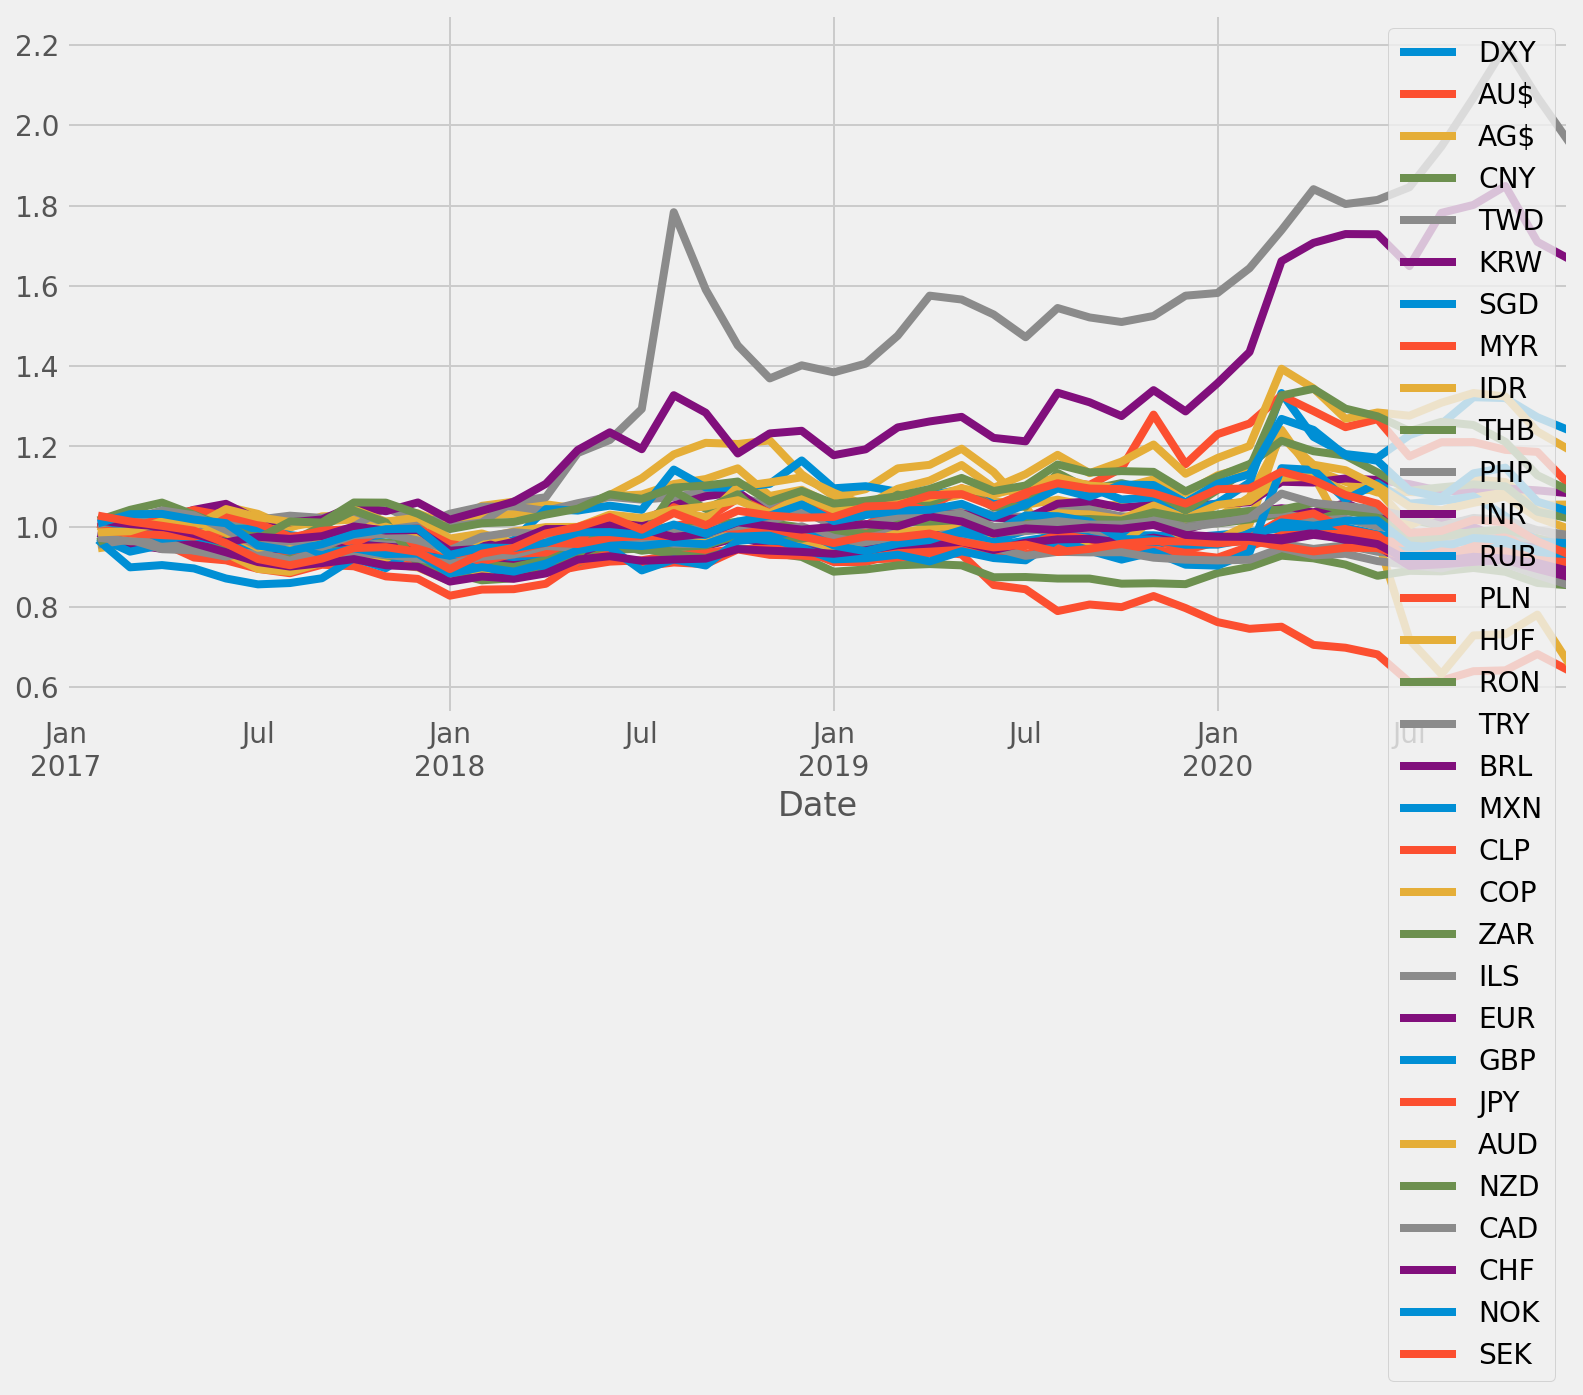

In [418]:
monthly = di.resample('BM').apply(lambda x: x[-1])
monthly
mon_ret = monthly.pct_change() #monthly return

mon_cumret = (1+mon_ret).cumprod() # monthly cumulative return
mon_cumret.plot(figsize = (12,6))

In [419]:
sum_cur_mon = mon_ret.iloc[1:,1:].sum(axis=1) #
sum_cur_mon

Date
2017-02-28   -0.260547
2017-03-31   -0.132048
2017-04-28   -0.014472
2017-05-31   -0.267668
2017-06-30   -0.109715
2017-07-31   -0.507775
2017-08-31   -0.153894
2017-09-29    0.253598
2017-10-31    0.432847
2017-11-30   -0.215929
2017-12-29   -0.257021
2018-01-31   -0.980448
2018-02-28    0.413521
2018-03-30    0.060475
2018-04-30    0.525648
2018-05-31    0.717939
2018-06-29    0.800802
2018-07-31   -0.221491
2018-08-31    1.132058
2018-09-28   -0.217062
2018-10-31    0.451010
2018-11-30   -0.364836
2018-12-31    0.143571
2019-01-31   -0.760154
2019-02-28    0.150610
2019-03-29    0.492908
2019-04-30    0.207321
2019-05-31    0.386262
2019-06-28   -0.843752
2019-07-31    0.188958
2019-08-30    0.601623
2019-09-30   -0.251623
2019-10-31   -0.197809
2019-11-29    0.441593
2019-12-31   -0.697056
2020-01-31    0.441361
2020-02-28    0.590877
2020-03-31    2.041864
2020-04-30   -0.453899
2020-05-29   -0.553343
2020-06-30   -0.339307
2020-07-31   -1.187664
2020-08-31    0.080827
2020-0

<AxesSubplot:xlabel='Date'>

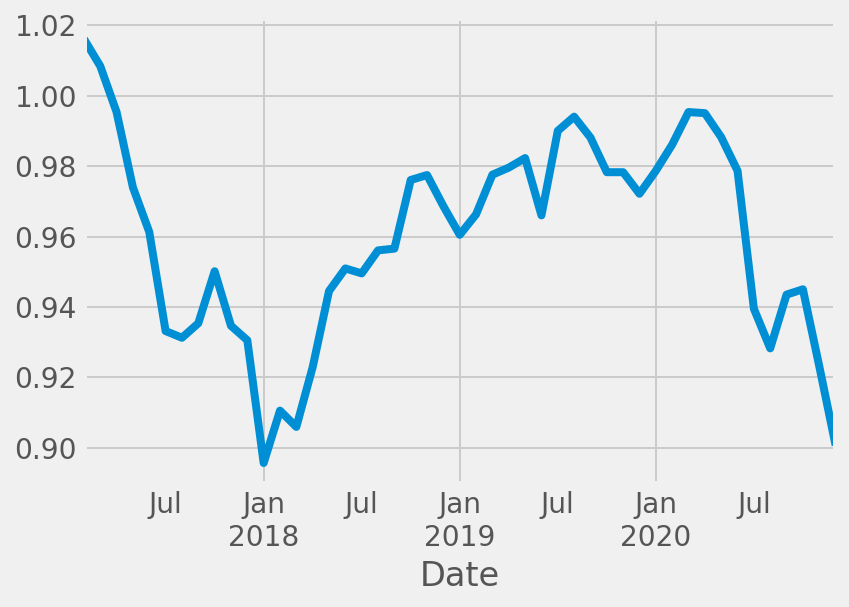

In [420]:
usd_idx_ret = mon_ret['DXY'][1:]
usd_idx_cum_ret = (1+usd_idx_ret).cumprod()
# Cal monthly cumulative return from 2018-2019:
#usd_idx_cum_ret.1819 = (1+usd_idx_ret['2018-01-01':'2019-12-31']).cumprod()
usd_idx_cum_ret.plot() #dxy cumulative monthly return

In [421]:
df5 = pd.DataFrame(data = {'DXY_mon_ret':usd_idx_ret, 'CUR_mon_ret':sum_cur_mon})

# equal weigts
eqw = usd_idx_ret/sum_cur_mon  #equal weights

df5['equal_w'] = eqw
df5['dummy_index'] = df5['CUR_mon_ret']*df5["equal_w"] # multi_ew is to check the weights
comb = pd.concat([df5,mon_ret.iloc[1:,1:]],axis=1)
comb

,DXY_mon_ret,CUR_mon_ret,equal_w,dummy_index,AU$,AG$,CNY,TWD,KRW,SGD,...,ILS,EUR,GBP,JPY,AUD,NZD,CAD,CHF,NOK,SEK
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-28,0.016179,-0.260547,-0.062097,0.016179,-0.038245,-0.054158,-0.001541,-0.023106,-0.030166,-0.010513,...,-0.027826,0.011747,0.004875,-0.007963,-0.014450,0.015298,0.006457,0.015196,0.008082,0.027337
2017-03-31,-0.007615,-0.132048,0.057667,-0.007615,0.008421,0.012182,0.002751,-0.011549,-0.014921,-0.005743,...,-0.008985,-0.009621,-0.003135,-0.008595,0.002763,0.025946,0.011041,-0.008945,0.022573,-0.014232
2017-04-28,-0.012955,-0.014472,0.895164,-0.012955,-0.017946,0.037335,0.001147,-0.005017,0.011566,-0.000365,...,-0.001248,-0.016309,-0.032194,-0.004921,0.025178,0.017446,0.022156,-0.006067,0.000631,-0.010699
2017-05-31,-0.021504,-0.267668,0.080340,-0.021504,0.000791,0.005777,-0.005959,-0.001592,-0.005345,-0.007947,...,-0.023051,-0.027519,0.006602,-0.003479,0.001053,-0.028635,-0.011572,-0.018635,-0.013611,-0.012002
2017-06-30,-0.013000,-0.109715,0.118492,-0.013000,0.017904,0.051002,-0.010225,0.008472,0.019788,-0.005196,...,-0.015896,-0.023595,-0.015537,0.010556,-0.029390,-0.030535,-0.035456,-0.021049,-0.008782,-0.031588
2017-07-31,-0.029270,-0.507775,0.057644,-0.029270,-0.019101,-0.017303,-0.006897,-0.003657,-0.019273,-0.015532,...,0.018855,-0.026018,-0.010175,-0.013383,-0.037658,-0.027989,-0.040885,0.014519,-0.054937,-0.041222
2017-08-31,-0.002046,-0.153894,0.013296,-0.002046,-0.031961,-0.033449,-0.021250,-0.003505,-0.000641,0.000376,...,0.009520,-0.012288,0.017364,-0.000452,0.009982,0.043895,0.013321,-0.005644,-0.014277,-0.016746
2017-09-29,0.004424,0.253598,0.017446,0.004424,0.018482,0.028470,0.010507,0.007632,0.020128,0.000597,...,-0.015470,0.009479,-0.037948,0.018170,0.007741,-0.002622,-0.015134,0.007139,0.017726,0.018092
2017-10-31,0.015793,0.432847,0.036486,0.015793,0.010021,0.002378,-0.003391,-0.006026,-0.019626,0.001318,...,-0.002116,0.011075,0.016479,0.004704,0.019310,0.049462,0.031199,0.024872,0.026308,0.028736


In [422]:
# nw_cur_ret = play.iloc[:,4:].apply(lambda x: x*eqw).sum(axis=1) # to check
comb.iloc[:,4:].apply(lambda x: x*eqw)
eqw_cur_monret = comb.iloc[:,4:].apply(lambda x: x*eqw).add_prefix('eqw_')
eqw_cur_monret

,eqw_AU$,eqw_AG$,eqw_CNY,eqw_TWD,eqw_KRW,eqw_SGD,eqw_MYR,eqw_IDR,eqw_THB,eqw_PHP,...,eqw_ILS,eqw_EUR,eqw_GBP,eqw_JPY,eqw_AUD,eqw_NZD,eqw_CAD,eqw_CHF,eqw_NOK,eqw_SEK
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-28,0.002375,0.003363,0.000096,1.434831e-03,0.001873,0.000653,-0.000144,-0.000005,0.000618,-0.000530,...,0.001728,-0.000729,-0.000303,4.944844e-04,0.000897,-0.000950,-0.000401,-0.000944,-0.000502,-0.001698
2017-03-31,0.000486,0.000702,0.000159,-6.659921e-04,-0.000860,-0.000331,-0.000188,-0.000173,-0.000598,-0.000032,...,-0.000518,-0.000555,-0.000181,-4.956234e-04,0.000159,0.001496,0.000637,-0.000516,0.001302,-0.000821
2017-04-28,-0.016065,0.033421,0.001027,-4.490902e-03,0.010354,-0.000327,-0.016899,0.003500,0.002882,-0.004326,...,-0.001117,-0.014599,-0.028819,-4.404730e-03,0.022538,0.015617,0.019834,-0.005431,0.000565,-0.009577
2017-05-31,0.000064,0.000464,-0.000479,-1.279218e-04,-0.000429,-0.000638,-0.000948,-0.000193,-0.001106,-0.000218,...,-0.001852,-0.002211,0.000530,-2.795347e-04,0.000085,-0.002301,-0.000930,-0.001497,-0.001094,-0.000964
2017-06-30,0.002121,0.006043,-0.001212,1.003905e-03,0.002345,-0.000616,0.000075,-0.000365,-0.000500,0.001726,...,-0.001884,-0.002796,-0.001841,1.250788e-03,-0.003482,-0.003618,-0.004201,-0.002494,-0.001041,-0.003743
2017-07-31,-0.001101,-0.000997,-0.000398,-2.108037e-04,-0.001111,-0.000895,-0.000161,0.000182,-0.001088,0.000137,...,0.001087,-0.001500,-0.000587,-7.714461e-04,-0.002171,-0.001613,-0.002357,0.000837,-0.003167,-0.002376
2017-08-31,-0.000425,-0.000445,-0.000283,-4.660258e-05,-0.000009,0.000005,-0.000034,0.000014,-0.000048,0.000128,...,0.000127,-0.000163,0.000231,-6.015973e-06,0.000133,0.000584,0.000177,-0.000075,-0.000190,-0.000223
2017-09-29,0.000322,0.000497,0.000183,1.331513e-04,0.000351,0.000010,-0.000196,0.000228,0.000089,-0.000094,...,-0.000270,0.000165,-0.000662,3.169911e-04,0.000135,-0.000046,-0.000264,0.000125,0.000309,0.000316
2017-10-31,0.000366,0.000087,-0.000124,-2.198806e-04,-0.000716,0.000048,0.000079,0.000178,-0.000191,0.000561,...,-0.000077,0.000404,0.000601,1.716155e-04,0.000705,0.001805,0.001138,0.000907,0.000960,0.001048


In [423]:
df8 = pd.concat([df5,eqw_cur_monret],axis=1)
df8 # For adjusted index after clustering

,DXY_mon_ret,CUR_mon_ret,equal_w,dummy_index,eqw_AU$,eqw_AG$,eqw_CNY,eqw_TWD,eqw_KRW,eqw_SGD,...,eqw_ILS,eqw_EUR,eqw_GBP,eqw_JPY,eqw_AUD,eqw_NZD,eqw_CAD,eqw_CHF,eqw_NOK,eqw_SEK
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-28,0.016179,-0.260547,-0.062097,0.016179,0.002375,0.003363,0.000096,1.434831e-03,0.001873,0.000653,...,0.001728,-0.000729,-0.000303,4.944844e-04,0.000897,-0.000950,-0.000401,-0.000944,-0.000502,-0.001698
2017-03-31,-0.007615,-0.132048,0.057667,-0.007615,0.000486,0.000702,0.000159,-6.659921e-04,-0.000860,-0.000331,...,-0.000518,-0.000555,-0.000181,-4.956234e-04,0.000159,0.001496,0.000637,-0.000516,0.001302,-0.000821
2017-04-28,-0.012955,-0.014472,0.895164,-0.012955,-0.016065,0.033421,0.001027,-4.490902e-03,0.010354,-0.000327,...,-0.001117,-0.014599,-0.028819,-4.404730e-03,0.022538,0.015617,0.019834,-0.005431,0.000565,-0.009577
2017-05-31,-0.021504,-0.267668,0.080340,-0.021504,0.000064,0.000464,-0.000479,-1.279218e-04,-0.000429,-0.000638,...,-0.001852,-0.002211,0.000530,-2.795347e-04,0.000085,-0.002301,-0.000930,-0.001497,-0.001094,-0.000964
2017-06-30,-0.013000,-0.109715,0.118492,-0.013000,0.002121,0.006043,-0.001212,1.003905e-03,0.002345,-0.000616,...,-0.001884,-0.002796,-0.001841,1.250788e-03,-0.003482,-0.003618,-0.004201,-0.002494,-0.001041,-0.003743
2017-07-31,-0.029270,-0.507775,0.057644,-0.029270,-0.001101,-0.000997,-0.000398,-2.108037e-04,-0.001111,-0.000895,...,0.001087,-0.001500,-0.000587,-7.714461e-04,-0.002171,-0.001613,-0.002357,0.000837,-0.003167,-0.002376
2017-08-31,-0.002046,-0.153894,0.013296,-0.002046,-0.000425,-0.000445,-0.000283,-4.660258e-05,-0.000009,0.000005,...,0.000127,-0.000163,0.000231,-6.015973e-06,0.000133,0.000584,0.000177,-0.000075,-0.000190,-0.000223
2017-09-29,0.004424,0.253598,0.017446,0.004424,0.000322,0.000497,0.000183,1.331513e-04,0.000351,0.000010,...,-0.000270,0.000165,-0.000662,3.169911e-04,0.000135,-0.000046,-0.000264,0.000125,0.000309,0.000316
2017-10-31,0.015793,0.432847,0.036486,0.015793,0.000366,0.000087,-0.000124,-2.198806e-04,-0.000716,0.000048,...,-0.000077,0.000404,0.000601,1.716155e-04,0.000705,0.001805,0.001138,0.000907,0.000960,0.001048


## Features - betas, correlations, and volatilities

Markets representatives: "USD", "ACWI", "VIX", "CRUDE OIL"


- USD The Federal Reserve dollar indexes are designed to help estimate the overall effects of U.S. dollar exchange rate movements on U.S. international trade.
- AWCI: global equities market
- VIX:
    - a real-time market index representing the market's expectations for volatility over the coming 30 days.
    - Investors use the VIX to measure the level of risk, fear, or stress in the market when making investment decisions.
    - Traders can also trade the VIX using a variety of options and exchange-traded products, or use VIX values to price derivatives.


Dealing with financial market returns correlations, it is preferable to use the log returns,
but the CAPM beta is calculated on the simple percentage returns.

Furthermore, it is preferable to standardise the data for the clustering algorithms.

Thus, data transformation follows calculation log returns, correlation coefficients,
and calculate the betas, and finally standardise the data.

### Calculate cross-asset correlations
Correlations are a linear measure, so we use the log returns to reduce the likely distributional skew to FX returns,
though FX returns do tend to be less skewed than equities. But we check later below.

In [424]:
df1.sort_values(by='Date', inplace=True, ascending=False)
#df1 = df1.reset_index(drop=False) # drop index temporarily for calculation

<ipython-input-424-fe75b21924b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.sort_values(by='Date', inplace=True, ascending=False)


In [425]:
#df1.set_index('Date',inplace=True,drop = True)
df1.isnull().sum().sum()

0

In [426]:
# Calculate daily log return; delete the last row of null values
df1_logret = np.log(df1/df1.shift(-1))
df1_logret = df1_logret.iloc[:-1]
#df1_logret.isnull().sum().sum()
df1_logret.head()

,USD,ACWI,VIX,CRUDE OIL,AU$,AG$,CNY,TWD,KRW,SGD,...,ILS,EUR,GBP,JPY,AUD,NZD,CAD,CHF,NOK,SEK
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-30,-0.001860,0.003554,-0.013523,0.005930,-0.004509,-0.005910,-0.000857,0.000626,-0.002176,-0.001604,...,-0.001072,-0.002411,-0.002513,-0.001255,-0.002760,-0.005696,-0.001395,-0.004739,-0.001478,-0.006786
2020-12-29,-0.004149,0.010924,-0.009916,-0.012021,-0.001629,-0.032452,-0.001009,-0.000846,-0.011784,-0.004211,...,-0.002543,-0.003015,-0.004957,0.001496,-0.004917,-0.007587,-0.004142,0.000495,-0.011370,-0.007970
2020-12-23,-0.001945,0.003722,-0.038709,0.023185,0.002216,0.017814,-0.000917,-0.000327,0.005539,0.001747,...,-0.006879,0.004115,0.003732,0.001876,0.003107,0.005993,0.003115,0.002684,0.010566,0.009109
2020-12-22,0.002293,-0.001497,-0.037664,-0.014529,-0.000309,0.014829,0.001865,-0.001030,0.002617,0.000976,...,0.004856,-0.001699,-0.003544,-0.001132,0.001612,0.001157,0.003320,0.000000,0.000554,-0.003923
2020-12-21,0.003073,-0.008159,0.153952,-0.030358,0.002520,-0.013085,0.000597,0.001457,0.006225,0.003989,...,-0.001498,0.003806,0.012474,0.003156,0.003667,0.006036,0.006233,0.000859,0.007512,0.000806


### Calculate the correlations between log returns

In [427]:
correlations = df1_logret.corr()
correlations.head()

,USD,ACWI,VIX,CRUDE OIL,AU$,AG$,CNY,TWD,KRW,SGD,...,ILS,EUR,GBP,JPY,AUD,NZD,CAD,CHF,NOK,SEK
USD,1.000000,-0.463693,0.201640,-0.209163,0.369495,0.325625,0.015276,0.081856,0.134214,0.229506,...,0.130868,0.202805,0.164112,0.079406,0.250704,0.206828,0.288399,0.160864,0.178554,0.223975
ACWI,-0.463693,1.000000,-0.642892,0.340905,-0.217615,-0.288156,0.018286,-0.105583,-0.050552,-0.075945,...,0.066018,-0.087284,-0.070919,0.040816,-0.199004,-0.157245,-0.132777,-0.002135,-0.097483,-0.082089
VIX,0.201640,-0.642892,1.000000,-0.182255,0.012055,0.068008,-0.026744,0.071367,0.014724,0.023434,...,-0.069552,0.012072,0.024377,-0.010001,0.063948,0.050098,0.020815,-0.044860,-0.000987,0.003408
CRUDE OIL,-0.209163,0.340905,-0.182255,1.000000,-0.091962,-0.131612,-0.004593,-0.040120,-0.016791,0.002399,...,-0.009218,0.020918,0.001014,0.041859,-0.050266,0.000507,-0.127705,0.040064,-0.108234,-0.044520
AU$,0.369495,-0.217615,0.012055,-0.091962,1.000000,0.715557,0.074948,0.128178,0.085442,0.182422,...,0.045620,0.231866,0.133305,0.314751,0.198658,0.174945,0.141558,0.292127,0.081158,0.179786


A dataframe of correlations between USD, Equity (with a proxy of ACWI), VIX, CRUDE OIL is built as below.

In [428]:
ys = ["USD", "ACWI", "VIX", "CRUDE OIL"]
corrs = []
# Correlations
for i in range(len(ys)):
    corrs.append(correlations[ys[i]].iloc[4:])
    correlations_df = pd.concat(corrs,axis = 1)
    correlations_df= correlations_df.add_prefix('corr_')

correlations_df.head()

,corr_USD,corr_ACWI,corr_VIX,corr_CRUDE OIL
AU$,0.369495,-0.217615,0.012055,-0.091962
AG$,0.325625,-0.288156,0.068008,-0.131612
CNY,0.015276,0.018286,-0.026744,-0.004593
TWD,0.081856,-0.105583,0.071367,-0.040120
KRW,0.134214,-0.050552,0.014724,-0.016791


### Calculate betas

Firstly, generate simple percentage returns to calculate the respective betas

In [429]:
df1_ret = (df1/df1.shift(-1))-1
df1_ret = df1_ret.iloc[:-1] # delete the last row of NAs
df1_ret

df1_ret.isnull().sum().sum()

0

A function to calculate beta

In [430]:
from sklearn.linear_model import LinearRegression
def beta(df, Y): #if using (df1_logreturn) / retun
    y = df.loc[:,Y] # USD, ACWI, VIX, CRUDE OIL
    x = df.iloc[:,4:] # Currencies
    cols = df.columns[4:].to_list()
    reg = LinearRegression().fit(x,y)
    #r = pd.Series(reg.score(x, y), name = 'Rˆ2')
    #data = reg.coef_ + r
    #print(data)
    b = pd.DataFrame(data = reg.coef_, index = cols, columns=["beta_" +Y])
    return b

### Calculate beta - USD, ACWI VIX, CRUDE OIL

The beta calculation is used to identify whether a constitute moves in the same direction as the rest of the market.
It also provides insights about how volatile–or how risky–a stock is relative to the rest of the market.

In [431]:
ys = ["USD", "ACWI", "VIX", "CRUDE OIL"]
betas = []
beta(df1_ret, ys[0])

,beta_USD
AU$,0.141483
AG$,0.007110
CNY,-0.135869
TWD,-0.020358
KRW,-0.037071
SGD,0.095727
MYR,0.093807
IDR,0.016941
THB,0.004230
PHP,-0.002475


In [432]:
# a dataframe of betas
for i in range(len(ys)):
    betas.append(beta(df1_ret, ys[i]))
    betas_ret_df = pd.concat(betas,axis = 1)

betas_ret_df

,beta_USD,beta_ACWI,beta_VIX,beta_CRUDE OIL
AU$,0.141483,-0.072404,-0.934253,-0.282181
AG$,0.007110,-0.142871,0.742308,-0.170409
CNY,-0.135869,0.212295,-1.725913,-0.273185
TWD,-0.020358,-0.250179,2.279828,-0.527651
KRW,-0.037071,0.059999,0.390645,0.359806
SGD,0.095727,0.252519,1.598657,0.808508
MYR,0.093807,-0.038484,0.124130,0.327850
IDR,0.016941,-0.019938,0.122639,-0.236102
THB,0.004230,-0.003562,-0.609492,-0.610908
PHP,-0.002475,-0.044530,-0.087521,-0.093869


### Calculate Volatility

1. Historical vols include standard deviation of daily spot exchange rates, daily log return of exchange rates;
(2. Implied vols: 25 days delta, which could be useful but the data is hardly to get)

In [433]:
#logreturn std
#his_vol = pd.Series(df1_logret.std(), df1_logret[1:], name = "logret_his_std")

# a Back-up
# exchange rates std
# fx_std = df1.iloc[:,4:].std()
# fx_std

# log return std
std_logret = pd.Series(df1_logret.iloc[:,4:].std(),name = 'std_logret')
std_ret = pd.Series(df1_ret.iloc[:,4:].std(), name = 'std_ret')
stds_df = pd.concat([std_logret, std_ret],axis = 1)

### Yield spread

yield spread between yields of 10 year government bond in every currency and that US 10 yr

Bond yields differentials usually move in tandem with currency pairs.
This phenomenon occurs because capital flows are attracted to higher yielding currencies.
As the rate of one currency increases relative to another, investors are attracted to the higher yielding currency.

In [434]:
yd = pd.read_csv('Yields_10y.csv',index_col=0)
yspr = yd.iloc[1:,1]

,corr_USD,corr_ACWI,corr_VIX,corr_CRUDE OIL,beta_USD,beta_ACWI,beta_VIX,beta_CRUDE OIL,std_logret,std_ret,SPREAD
AU$,0.369495,-0.217615,0.012055,-0.091962,0.141483,-0.072404,-0.934253,-0.282181,0.007779,0.007769,-1.670
AG$,0.325625,-0.288156,0.068008,-0.131612,0.007110,-0.142871,0.742308,-0.170409,0.016730,0.016938,-1.670
CNY,0.015276,0.018286,-0.026744,-0.004593,-0.135869,0.212295,-1.725913,-0.273185,0.002865,0.002866,1.580
TWD,0.081856,-0.105583,0.071367,-0.040120,-0.020358,-0.250179,2.279828,-0.527651,0.003305,0.003303,-0.740
KRW,0.134214,-0.050552,0.014724,-0.016791,-0.037071,0.059999,0.390645,0.359806,0.005087,0.005084,-0.020
SGD,0.229506,-0.075945,0.023434,0.002399,0.095727,0.252519,1.598657,0.808508,0.002726,0.002726,0.070
MYR,0.148515,-0.000298,-0.011432,0.004999,0.093807,-0.038484,0.124130,0.327850,0.002834,0.002832,1.410
IDR,0.109158,-0.012238,0.003912,-0.017558,0.016941,-0.019938,0.122639,-0.236102,0.007312,0.007320,5.110
THB,0.171469,-0.065147,0.008002,-0.039108,0.004230,-0.003562,-0.609492,-0.610908,0.003105,0.003107,0.110
PHP,0.042555,-0.012721,-0.006406,0.018549,-0.002475,-0.044530,-0.087521,-0.093869,0.004007,0.004003,2.930


Consolidating all features together

1. Correlations: correlations_df
2. Betas: betas_ret_df
3. Volatilities: stds_df
4. Spread: yspr

In [ ]:
features  = pd.concat([correlations_df, betas_ret_df, stds_df],axis=1,join="outer")

features  = pd.concat([correlations_df, betas_ret_df, stds_df,yspr],axis=1,join="outer")

features= features.fillna(-1.67)
features
#yspr_df = pd.DataFrame(data = [0,0]index = stds_df.index)     stds_df.index
features.to_csv('features.csv')
features

# K-means Clustering

We come back from Agglomerative Hierachy clustering at the end to the most applicable clustering type.
The clustering results are more justifiable to common knowledge than those of AHC.

In [435]:
dataset1 = features.reset_index()
dataset2 = dataset1['index']
dataset3 = dataset1.iloc[:,1:]
dataset3

,corr_USD,corr_ACWI,corr_VIX,corr_CRUDE OIL,beta_USD,beta_ACWI,beta_VIX,beta_CRUDE OIL,std_logret,std_ret,SPREAD
0,0.369495,-0.217615,0.012055,-0.091962,0.141483,-0.072404,-0.934253,-0.282181,0.007779,0.007769,-1.670
1,0.325625,-0.288156,0.068008,-0.131612,0.007110,-0.142871,0.742308,-0.170409,0.016730,0.016938,-1.670
2,0.015276,0.018286,-0.026744,-0.004593,-0.135869,0.212295,-1.725913,-0.273185,0.002865,0.002866,1.580
3,0.081856,-0.105583,0.071367,-0.040120,-0.020358,-0.250179,2.279828,-0.527651,0.003305,0.003303,-0.740
4,0.134214,-0.050552,0.014724,-0.016791,-0.037071,0.059999,0.390645,0.359806,0.005087,0.005084,-0.020
5,0.229506,-0.075945,0.023434,0.002399,0.095727,0.252519,1.598657,0.808508,0.002726,0.002726,0.070
6,0.148515,-0.000298,-0.011432,0.004999,0.093807,-0.038484,0.124130,0.327850,0.002834,0.002832,1.410
7,0.109158,-0.012238,0.003912,-0.017558,0.016941,-0.019938,0.122639,-0.236102,0.007312,0.007320,5.110
8,0.171469,-0.065147,0.008002,-0.039108,0.004230,-0.003562,-0.609492,-0.610908,0.003105,0.003107,0.110
9,0.042555,-0.012721,-0.006406,0.018549,-0.002475,-0.044530,-0.087521,-0.093869,0.004007,0.004003,2.930


In [436]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scaler = StandardScaler()

scaled = scaler.fit_transform(dataset3)
scaled = pd.DataFrame(scaled)
scaled.columns = dataset3.columns
scaled.head()


,corr_USD,corr_ACWI,corr_VIX,corr_CRUDE OIL,beta_USD,beta_ACWI,beta_VIX,beta_CRUDE OIL,std_logret,std_ret,SPREAD
0,2.338137,-1.841123,0.024903,-1.249858,2.209359,-0.382100,-0.665124,-0.585667,0.241554,0.205915,-0.912176
1,1.813077,-2.761532,1.577770,-2.033132,-0.036141,-0.740250,0.569835,-0.351740,2.600719,2.493206,-0.912176
2,-1.901353,1.236898,-1.051902,0.476114,-2.425444,1.064880,-1.248264,-0.566841,-1.053309,-1.017074,-0.015950
3,-1.104485,-0.379345,1.670981,-0.225729,-0.495148,-1.285641,1.702378,-1.099411,-0.937467,-0.908144,-0.655717
4,-0.477842,0.338699,0.098963,0.235133,-0.774444,0.290836,0.310800,0.757945,-0.467818,-0.463809,-0.457169


#### PCA
Clustering algorithms such as KMeans have a difficult time accurately clustering data of high dimensionality (ie. too many features).
Our dataset is not necessarily highly dimensional as it contains 11 features but even this amount will create issues for KMeans.
When our clustering algorithm has too many dimensions, pairs of points will begin to have very similar distances and we wouldn’t be able to obtain meaningful clusters.


In [437]:
pca = PCA(random_state = 42)

In [438]:
pca.fit(scaled)

PCA(random_state=42)

In [439]:
pca.components_

array([[ 3.49097934e-01, -4.19061527e-01,  3.71921238e-01,
        -3.87958025e-01,  2.35531782e-01, -3.09414475e-01,
         2.56516245e-01, -2.21345475e-01,  2.72932945e-01,
         2.68164183e-01, -3.56352298e-02],
       [ 1.35747951e-01, -4.18538212e-02,  1.45338438e-01,
         2.04215652e-01,  2.77576018e-01, -2.52049723e-01,
         3.27458573e-01,  4.02081449e-02, -5.03340560e-01,
        -5.03841868e-01, -4.00451982e-01],
       [-4.09867447e-01,  1.65885004e-01,  1.22561103e-01,
         2.43323314e-01,  1.77788741e-02, -4.21159904e-01,
         5.18192816e-01,  2.24164698e-01,  1.10896153e-01,
         1.10542216e-01,  4.57471841e-01],
       [-3.08687797e-01,  4.62000407e-02,  1.93093615e-01,
        -1.95816922e-01, -4.20374779e-01, -1.10694175e-01,
         1.39863990e-02, -7.28614297e-01, -2.14781665e-01,
        -2.15925094e-01,  1.18956340e-01],
       [ 4.73176052e-02,  2.94248792e-01, -3.99342086e-01,
        -1.65362687e-01,  6.81935673e-01, -7.15647528e-02,
  

In [440]:
pca.explained_variance_ratio_

array([4.10170803e-01, 1.99222180e-01, 1.28159833e-01, 9.73016265e-02,
       7.17410736e-02, 4.69069452e-02, 2.62761309e-02, 9.96141978e-03,
       6.43167063e-03, 3.72314812e-03, 1.05169214e-04])

In [441]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

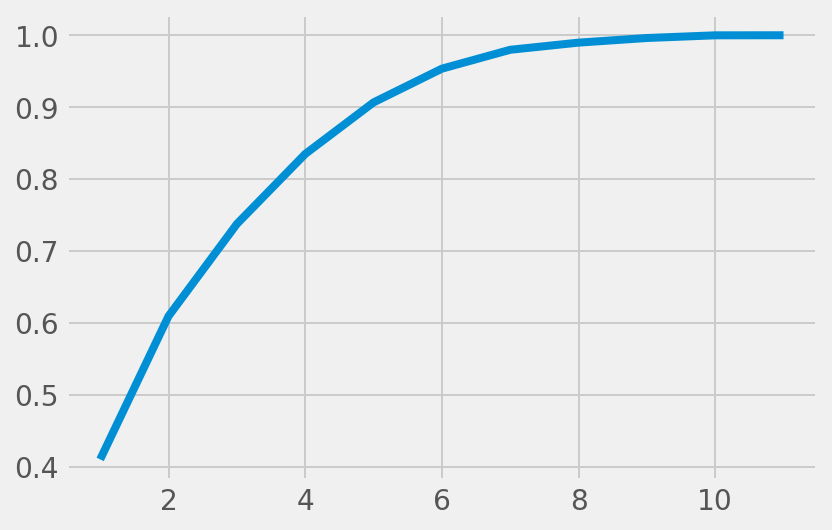

In [442]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [443]:
final = PCA(n_components = 6, random_state = 42)
final_np = final.fit_transform(scaled)
final_np.shape

(31, 6)

In [444]:
final_df = pd.DataFrame(final_np)
final_df.columns = ['PC1','PC2','PC3','PC4','PC5','PC6']
final_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,2.833211,0.751008,-2.208297,-1.231155,1.223424,-0.244278
1,5.021246,-1.675128,-0.828276,-0.828534,-1.564328,0.636553
2,-3.413180,-0.689715,-0.530635,2.088938,-0.677999,0.314676
3,0.967621,1.954572,1.203683,2.185031,-0.892715,0.324383
4,-0.959371,0.479569,0.203790,0.027922,-0.935609,0.056620


In [445]:
dataset2.head()

0    AU$
1    AG$
2    CNY
3    TWD
4    KRW
Name: index, dtype: object

In [446]:
final_pca = pd.concat([final_df,dataset2],axis = 1)
final_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,index
0,2.833211,0.751008,-2.208297,-1.231155,1.223424,-0.244278,AU$
1,5.021246,-1.675128,-0.828276,-0.828534,-1.564328,0.636553,AG$
2,-3.413180,-0.689715,-0.530635,2.088938,-0.677999,0.314676,CNY
3,0.967621,1.954572,1.203683,2.185031,-0.892715,0.324383,TWD
4,-0.959371,0.479569,0.203790,0.027922,-0.935609,0.056620,KRW


We want to select the number of clusters at the elbow of the line chart or the lowest sum of squared distances (ie. Inertia) at the lowest number of clusters.
The lower the sum of squares distances means the data inside each cluster are more tightly grouped.

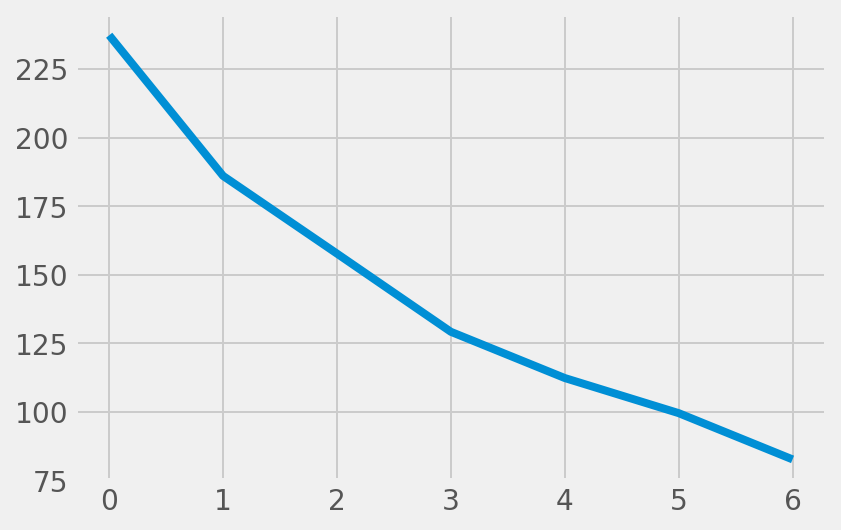

In [447]:
from sklearn.cluster import KMeans
#from adspy_shared_utilities import plot_labelled_scatter
from sklearn.metrics import silhouette_score

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(final_df)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters

plt.plot(ssd)


In [448]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:

    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(final_df)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(final_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


For n_clusters=2, the silhouette score is 0.30973956535558095
For n_clusters=3, the silhouette score is 0.21944444096769936
For n_clusters=4, the silhouette score is 0.23187081355106803
For n_clusters=5, the silhouette score is 0.22976404415139492
For n_clusters=6, the silhouette score is 0.23624605187819375
For n_clusters=7, the silhouette score is 0.23818203995099987
For n_clusters=8, the silhouette score is 0.21744289596771985


According to the Elbow graph and silhouette_score, we determine the clusters number as 4.
Applying k-means algorithm to the X dataset.

In [449]:
kmeans = KMeans(n_clusters=4, max_iter=50)
y_kmeans = kmeans.fit(final_df)

#### Clustering results as following.

In [512]:
final_pca['cluster_id'] = pd.DataFrame(kmeans.labels_)
final_pca

,PC1,PC2,PC3,PC4,PC5,PC6,index,cluster_id
0,2.833211,0.751008,-2.208297,-1.231155,1.223424,-0.244278,AU$,2
1,5.021246,-1.675128,-0.828276,-0.828534,-1.564328,0.636553,AG$,2
2,-3.413180,-0.689715,-0.530635,2.088938,-0.677999,0.314676,CNY,1
3,0.967621,1.954572,1.203683,2.185031,-0.892715,0.324383,TWD,3
4,-0.959371,0.479569,0.203790,0.027922,-0.935609,0.056620,KRW,3
5,-0.567734,2.059036,-0.020481,-1.816345,-0.011054,-1.123607,SGD,3
6,-1.303676,1.547996,0.443610,-0.741365,1.261787,-0.066748,MYR,3
7,-0.556343,-0.533336,0.948315,0.581988,0.821717,0.024300,IDR,3
8,-0.375128,0.878052,-0.925579,1.370315,0.527965,0.020463,THB,3
9,-1.796741,0.461527,0.982764,0.858201,0.384579,0.247237,PHP,3


In [513]:
final_clustering = movecol(final_pca, cols_to_move=['index','cluster_id'], ref_col="PC1", place='Before')
final_clustering

,index,cluster_id,PC1,PC2,PC3,PC4,PC5,PC6
0,AU$,2,2.833211,0.751008,-2.208297,-1.231155,1.223424,-0.244278
1,AG$,2,5.021246,-1.675128,-0.828276,-0.828534,-1.564328,0.636553
2,CNY,1,-3.413180,-0.689715,-0.530635,2.088938,-0.677999,0.314676
3,TWD,3,0.967621,1.954572,1.203683,2.185031,-0.892715,0.324383
4,KRW,3,-0.959371,0.479569,0.203790,0.027922,-0.935609,0.056620
5,SGD,3,-0.567734,2.059036,-0.020481,-1.816345,-0.011054,-1.123607
6,MYR,3,-1.303676,1.547996,0.443610,-0.741365,1.261787,-0.066748
7,IDR,3,-0.556343,-0.533336,0.948315,0.581988,0.821717,0.024300
8,THB,3,-0.375128,0.878052,-0.925579,1.370315,0.527965,0.020463
9,PHP,3,-1.796741,0.461527,0.982764,0.858201,0.384579,0.247237


In [514]:
final_clustering = final_clustering.sort_values(by = 'cluster_id',ascending=False)
final_clustering.to_csv("final_clustering.csv")
clusters_fx = final_clustering[['index','cluster_id']]
#The final clustering results

In [515]:
clusters_fx["index"] = clusters_fx["index"].map(lambda x: str('eqw_') +x)
clusters_fx = clusters_fx.set_index('index')
clusters_fx

<ipython-input-515-c04f08dedfff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusters_fx["index"] = clusters_fx["index"].map(lambda x: str('eqw_') +x)


,cluster_id
index,
eqw_SEK,3
eqw_TWD,3
eqw_KRW,3
eqw_SGD,3
eqw_MYR,3
eqw_IDR,3
eqw_THB,3
eqw_PHP,3
eqw_NZD,3


In [518]:
temp = df8.T.iloc[4:,:]
merge = clusters_fx.merge(temp,left_index=True,right_index=True)

merge

,cluster_id,2017-02-28 00:00:00,2017-03-31 00:00:00,2017-04-28 00:00:00,2017-05-31 00:00:00,2017-06-30 00:00:00,2017-07-31 00:00:00,2017-08-31 00:00:00,2017-09-29 00:00:00,2017-10-31 00:00:00,...,2020-03-31 00:00:00,2020-04-30 00:00:00,2020-05-29 00:00:00,2020-06-30 00:00:00,2020-07-31 00:00:00,2020-08-31 00:00:00,2020-09-30 00:00:00,2020-10-30 00:00:00,2020-11-30 00:00:00,2020-12-31 00:00:00
eqw_SEK,3,-0.001698,-0.000821,-0.009577,-0.000964,-0.003743,-0.002376,-0.000223,0.000316,0.001048,...,0.000174,-0.000012,-0.000410,-0.000576,-0.002322,-0.000746,0.000758,0.000183,-0.001226,-0.001070
eqw_TWD,3,0.001435,-0.000666,-0.004491,-0.000128,0.001004,-0.000211,-0.000047,0.000133,-0.000220,...,-0.000025,-0.000009,0.000117,-0.000475,-0.000288,-0.000830,-0.000405,0.000578,0.000141,-0.000429
eqw_KRW,3,0.001873,-0.000860,0.010354,-0.000429,0.002345,-0.001111,-0.000009,0.000351,-0.000716,...,0.000043,-0.000007,0.000279,-0.000908,-0.000251,0.000371,-0.000433,0.001046,-0.000584,-0.000330
eqw_SGD,3,0.000653,-0.000331,-0.000327,-0.000638,-0.000616,-0.000895,0.000005,0.000010,0.000048,...,0.000096,-0.000006,0.000057,-0.000475,-0.000535,0.000606,0.000048,0.000044,-0.000547,-0.000241
eqw_MYR,3,-0.000144,-0.000188,-0.016899,-0.000948,0.000075,-0.000161,-0.000034,-0.000196,0.000079,...,0.000134,0.000002,0.000019,-0.000429,-0.000358,0.002344,-0.000099,0.000004,-0.000551,-0.000145
eqw_IDR,3,-0.000005,-0.000173,0.003500,-0.000193,-0.000365,0.000182,0.000014,0.000228,0.000178,...,0.000651,-0.000045,-0.000334,-0.000681,0.000038,0.000416,0.000881,0.000197,-0.001336,0.000018
eqw_THB,3,0.000618,-0.000598,0.002882,-0.001106,-0.000500,-0.001088,-0.000048,0.000089,-0.000191,...,0.000144,-0.000005,-0.000210,-0.000876,0.000475,0.000213,0.000262,0.000343,-0.000819,-0.000212
eqw_PHP,3,-0.000530,-0.000032,-0.004326,-0.000218,0.001726,0.000137,0.000128,-0.000094,0.000561,...,0.000039,-0.000013,0.000062,-0.000534,-0.000407,0.001782,-0.000079,-0.000014,-0.000144,-0.000006
eqw_NZD,3,-0.000950,0.001496,0.015617,-0.002301,-0.003618,-0.001613,0.000584,-0.000046,0.001805,...,0.000231,-0.000014,-0.000116,-0.001008,-0.001357,-0.001150,0.000185,0.000138,-0.001508,-0.000494
eqw_GBP,3,-0.000303,-0.000181,-0.028819,0.000530,-0.001841,-0.000587,0.000231,-0.000662,0.000601,...,0.000192,-0.000005,0.000151,0.000025,-0.002075,0.000918,0.000710,0.000161,-0.000785,-0.000387


cluster_id,0,1,2,3
count,47.000000,47.000000,47.000000,47.000000
mean,1.000003,0.998881,1.000245,0.997816
std,0.007951,0.007786,0.012639,0.015052
min,0.967939,0.970556,0.973632,0.960508
25%,0.997250,0.996221,0.994884,0.990202
50%,1.000679,1.000000,1.000000,0.999697
75%,1.003741,1.003520,1.004574,1.006857
max,1.026510,1.011806,1.057878,1.024811


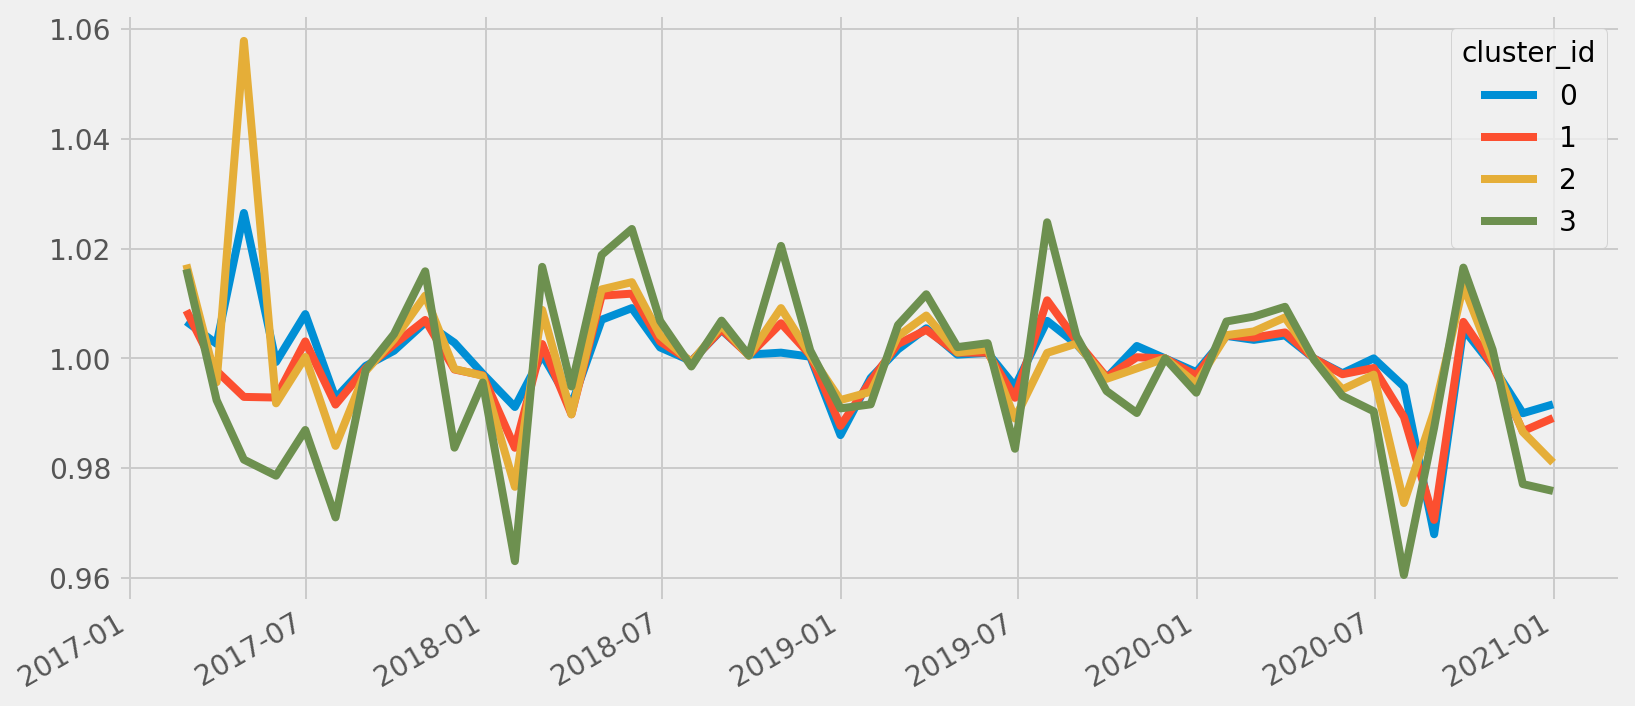

In [519]:
plt_all_cum_ret = (1+(merge.groupby(['cluster_id']).sum())).cumprod().T.plot(figsize=(12,6))
(1+(merge.groupby(['cluster_id']).sum())).cumprod().T.describe()

#### Strategy experiment (unfinished)

In [520]:
merge

,cluster_id,2017-02-28 00:00:00,2017-03-31 00:00:00,2017-04-28 00:00:00,2017-05-31 00:00:00,2017-06-30 00:00:00,2017-07-31 00:00:00,2017-08-31 00:00:00,2017-09-29 00:00:00,2017-10-31 00:00:00,...,2020-03-31 00:00:00,2020-04-30 00:00:00,2020-05-29 00:00:00,2020-06-30 00:00:00,2020-07-31 00:00:00,2020-08-31 00:00:00,2020-09-30 00:00:00,2020-10-30 00:00:00,2020-11-30 00:00:00,2020-12-31 00:00:00
eqw_SEK,3,-0.001698,-0.000821,-0.009577,-0.000964,-0.003743,-0.002376,-0.000223,0.000316,0.001048,...,0.000174,-0.000012,-0.000410,-0.000576,-0.002322,-0.000746,0.000758,0.000183,-0.001226,-0.001070
eqw_TWD,3,0.001435,-0.000666,-0.004491,-0.000128,0.001004,-0.000211,-0.000047,0.000133,-0.000220,...,-0.000025,-0.000009,0.000117,-0.000475,-0.000288,-0.000830,-0.000405,0.000578,0.000141,-0.000429
eqw_KRW,3,0.001873,-0.000860,0.010354,-0.000429,0.002345,-0.001111,-0.000009,0.000351,-0.000716,...,0.000043,-0.000007,0.000279,-0.000908,-0.000251,0.000371,-0.000433,0.001046,-0.000584,-0.000330
eqw_SGD,3,0.000653,-0.000331,-0.000327,-0.000638,-0.000616,-0.000895,0.000005,0.000010,0.000048,...,0.000096,-0.000006,0.000057,-0.000475,-0.000535,0.000606,0.000048,0.000044,-0.000547,-0.000241
eqw_MYR,3,-0.000144,-0.000188,-0.016899,-0.000948,0.000075,-0.000161,-0.000034,-0.000196,0.000079,...,0.000134,0.000002,0.000019,-0.000429,-0.000358,0.002344,-0.000099,0.000004,-0.000551,-0.000145
eqw_IDR,3,-0.000005,-0.000173,0.003500,-0.000193,-0.000365,0.000182,0.000014,0.000228,0.000178,...,0.000651,-0.000045,-0.000334,-0.000681,0.000038,0.000416,0.000881,0.000197,-0.001336,0.000018
eqw_THB,3,0.000618,-0.000598,0.002882,-0.001106,-0.000500,-0.001088,-0.000048,0.000089,-0.000191,...,0.000144,-0.000005,-0.000210,-0.000876,0.000475,0.000213,0.000262,0.000343,-0.000819,-0.000212
eqw_PHP,3,-0.000530,-0.000032,-0.004326,-0.000218,0.001726,0.000137,0.000128,-0.000094,0.000561,...,0.000039,-0.000013,0.000062,-0.000534,-0.000407,0.001782,-0.000079,-0.000014,-0.000144,-0.000006
eqw_NZD,3,-0.000950,0.001496,0.015617,-0.002301,-0.003618,-0.001613,0.000584,-0.000046,0.001805,...,0.000231,-0.000014,-0.000116,-0.001008,-0.001357,-0.001150,0.000185,0.000138,-0.001508,-0.000494
eqw_GBP,3,-0.000303,-0.000181,-0.028819,0.000530,-0.001841,-0.000587,0.000231,-0.000662,0.000601,...,0.000192,-0.000005,0.000151,0.000025,-0.002075,0.000918,0.000710,0.000161,-0.000785,-0.000387


In [528]:
merge['cluster_id']
merge.shape
merge

,cluster_id,2017-02-28 00:00:00,2017-03-31 00:00:00,2017-04-28 00:00:00,2017-05-31 00:00:00,2017-06-30 00:00:00,2017-07-31 00:00:00,2017-08-31 00:00:00,2017-09-29 00:00:00,2017-10-31 00:00:00,...,2020-03-31 00:00:00,2020-04-30 00:00:00,2020-05-29 00:00:00,2020-06-30 00:00:00,2020-07-31 00:00:00,2020-08-31 00:00:00,2020-09-30 00:00:00,2020-10-30 00:00:00,2020-11-30 00:00:00,2020-12-31 00:00:00
eqw_SEK,3,-0.001698,-0.000821,-0.009577,-0.000964,-0.003743,-0.002376,-0.000223,0.000316,0.001048,...,0.000174,-0.000012,-0.000410,-0.000576,-0.002322,-0.000746,0.000758,0.000183,-0.001226,-0.001070
eqw_TWD,3,0.001435,-0.000666,-0.004491,-0.000128,0.001004,-0.000211,-0.000047,0.000133,-0.000220,...,-0.000025,-0.000009,0.000117,-0.000475,-0.000288,-0.000830,-0.000405,0.000578,0.000141,-0.000429
eqw_KRW,3,0.001873,-0.000860,0.010354,-0.000429,0.002345,-0.001111,-0.000009,0.000351,-0.000716,...,0.000043,-0.000007,0.000279,-0.000908,-0.000251,0.000371,-0.000433,0.001046,-0.000584,-0.000330
eqw_SGD,3,0.000653,-0.000331,-0.000327,-0.000638,-0.000616,-0.000895,0.000005,0.000010,0.000048,...,0.000096,-0.000006,0.000057,-0.000475,-0.000535,0.000606,0.000048,0.000044,-0.000547,-0.000241
eqw_MYR,3,-0.000144,-0.000188,-0.016899,-0.000948,0.000075,-0.000161,-0.000034,-0.000196,0.000079,...,0.000134,0.000002,0.000019,-0.000429,-0.000358,0.002344,-0.000099,0.000004,-0.000551,-0.000145
eqw_IDR,3,-0.000005,-0.000173,0.003500,-0.000193,-0.000365,0.000182,0.000014,0.000228,0.000178,...,0.000651,-0.000045,-0.000334,-0.000681,0.000038,0.000416,0.000881,0.000197,-0.001336,0.000018
eqw_THB,3,0.000618,-0.000598,0.002882,-0.001106,-0.000500,-0.001088,-0.000048,0.000089,-0.000191,...,0.000144,-0.000005,-0.000210,-0.000876,0.000475,0.000213,0.000262,0.000343,-0.000819,-0.000212
eqw_PHP,3,-0.000530,-0.000032,-0.004326,-0.000218,0.001726,0.000137,0.000128,-0.000094,0.000561,...,0.000039,-0.000013,0.000062,-0.000534,-0.000407,0.001782,-0.000079,-0.000014,-0.000144,-0.000006
eqw_NZD,3,-0.000950,0.001496,0.015617,-0.002301,-0.003618,-0.001613,0.000584,-0.000046,0.001805,...,0.000231,-0.000014,-0.000116,-0.001008,-0.001357,-0.001150,0.000185,0.000138,-0.001508,-0.000494
eqw_GBP,3,-0.000303,-0.000181,-0.028819,0.000530,-0.001841,-0.000587,0.000231,-0.000662,0.000601,...,0.000192,-0.000005,0.000151,0.000025,-0.002075,0.000918,0.000710,0.000161,-0.000785,-0.000387


In [460]:
# top1_idx = merge.groupby('cluster_id').idxmax()
# non = pd.DataFrame(data=np.zeros([31,47]),index=merge.index,columns=merge.columns[1:])
# non

# w = merge.columns[1:].to_series()
# w = w.apply(lambda x: x.strftime('%Y-%m-%d'))
# a = pd.Series('cluster_id')
# a = a.append(w)
# merge.columns = a
# merge.columns
#
# for i in merge.columns[1:]:
#     for v in merge.index():
#         if v in top1_idx.loc[:,i]:
#
#             non.loc[top1_idx,]=1
# top1_idx
# merge.sort_values(by=merge.columns[1],ascending = False).groupby('cluster_id').nlargest(2)
# for i in range(len(merge.columns[1:])):
#     merge.sort_values(by=merge.columns[i],ascending = False).groupby('cluster_id').nlargest(2)

In [461]:
top=[]
for i in merge.columns[1:]:
    top.append(merge.loc[:,['cluster_id',i]].groupby('cluster_id').apply(lambda x: x.sort_values([i], ascending = False).head(2)))
top[1]

cluster_id  2017-03-31 00:00:00
cluster_id                                         
0          eqw_NZD           0             0.001496
           eqw_MYR           0            -0.000188
1          eqw_ZAR           1             0.001957
           eqw_CLP           1             0.001450
2          eqw_CNY           2             0.000159
           eqw_PHP           2            -0.000032
3          eqw_AG$           3             0.000702
           eqw_CAD           3             0.000637

In [462]:
l_top=[]
for i in range(len(top)):
    l_top.append(top[i].sum()[1])
(1+np.sum(l_top)).cumprod()
#len(l_top)

array([1.3908846])

In [463]:
low =[]
for i in merge.columns[1:]:
    low.append(merge.loc[:,['cluster_id',i]].groupby('cluster_id').apply(lambda x: x.sort_values([i], ascending = True).head(2)))

In [464]:
l_low=[]
for i in range(len(low)):
    l_low.append(low[i].sum()[1])

(1+np.sum(l_low)).cumprod()
#len(l_low)

array([0.577198])

In [465]:
date_col = merge.columns[1:]
#len(date_col)

In [466]:
d = {'Date': date_col, 'top': l_top,'bottom': l_low, 'DXY': mon_ret.iloc[1:,0]}
ret_str = pd.DataFrame(data=d, index=date_col)

ret_str.head()

,Date,top,bottom,DXY
2017-02-28 00:00:00,2017-02-28,0.016584,-0.004392,0.016179
2017-03-31 00:00:00,2017-03-31,0.006180,-0.012269,-0.007615
2017-04-28 00:00:00,2017-04-28,0.129596,-0.117142,-0.012955
2017-05-31 00:00:00,2017-05-31,0.004353,-0.014481,-0.021504
2017-06-30 00:00:00,2017-06-30,0.024502,-0.023530,-0.013000


<AxesSubplot:>

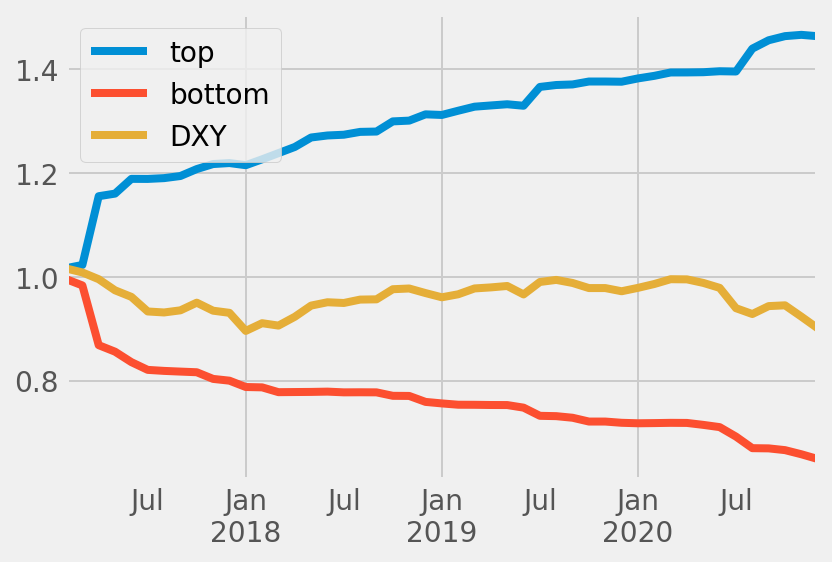

In [467]:
(1+ret_str.iloc[:,1]).cumprod().plot(legend=True)
(1+ret_str.iloc[:,2]).cumprod().plot(legend=True)
(1+ret_str.iloc[:,3]).cumprod().plot(legend=True)

In [468]:
# check calculation for DXY monthly
# mon_cumret.iloc[1:,0].values == (1+ret_str.iloc[:,3]).cumprod().values

In [469]:
top[0].sum()[1]

0.016584465593553255

In [ ]:
# for i in range(len(top)):
#     top[i].index.names = (['cluster_id', 'currencies'])

In [470]:
# top[0]['eqw_TRY']
# #top[0].index.values
# #top[0].loc[(slice(None),'currencies'),:]
#

In [471]:
# if str('eqw_TRY') in top[0].index.values:
#     print('y')

In [472]:
# merge['pos'] = np.zeros([31,1])

In [473]:
# for i in merge.index:
#     for n in range(len(top)):
#         #print(top[n]['cluster_id'])
#         if i in top[n]:
#             merge.loc[i,'pos']==1
#
# merge

##### Simple replacing strategy

In [538]:
compo = ['eqw_EUR', 'eqw_JPY', 'eqw_GBP','eqw_CAD','eqw_SEK','eqw_CHF']
merT = merge.T
rem_compo = merT[merT.columns.difference(compo)].T
rem_compo.sort_values('cluster_id',ascending=False)

,cluster_id,2017-02-28 00:00:00,2017-03-31 00:00:00,2017-04-28 00:00:00,2017-05-31 00:00:00,2017-06-30 00:00:00,2017-07-31 00:00:00,2017-08-31 00:00:00,2017-09-29 00:00:00,2017-10-31 00:00:00,...,2020-03-31 00:00:00,2020-04-30 00:00:00,2020-05-29 00:00:00,2020-06-30 00:00:00,2020-07-31 00:00:00,2020-08-31 00:00:00,2020-09-30 00:00:00,2020-10-30 00:00:00,2020-11-30 00:00:00,2020-12-31 00:00:00
eqw_SEK,3,-0.001698,-0.000821,-0.009577,-0.000964,-0.003743,-0.002376,-0.000223,0.000316,0.001048,...,0.000174,-0.000012,-0.000410,-0.000576,-0.002322,-0.000746,0.000758,0.000183,-0.001226,-0.001070
eqw_TWD,3,0.001435,-0.000666,-0.004491,-0.000128,0.001004,-0.000211,-0.000047,0.000133,-0.000220,...,-0.000025,-0.000009,0.000117,-0.000475,-0.000288,-0.000830,-0.000405,0.000578,0.000141,-0.000429
eqw_KRW,3,0.001873,-0.000860,0.010354,-0.000429,0.002345,-0.001111,-0.000009,0.000351,-0.000716,...,0.000043,-0.000007,0.000279,-0.000908,-0.000251,0.000371,-0.000433,0.001046,-0.000584,-0.000330
eqw_SGD,3,0.000653,-0.000331,-0.000327,-0.000638,-0.000616,-0.000895,0.000005,0.000010,0.000048,...,0.000096,-0.000006,0.000057,-0.000475,-0.000535,0.000606,0.000048,0.000044,-0.000547,-0.000241
eqw_MYR,3,-0.000144,-0.000188,-0.016899,-0.000948,0.000075,-0.000161,-0.000034,-0.000196,0.000079,...,0.000134,0.000002,0.000019,-0.000429,-0.000358,0.002344,-0.000099,0.000004,-0.000551,-0.000145
eqw_IDR,3,-0.000005,-0.000173,0.003500,-0.000193,-0.000365,0.000182,0.000014,0.000228,0.000178,...,0.000651,-0.000045,-0.000334,-0.000681,0.000038,0.000416,0.000881,0.000197,-0.001336,0.000018
eqw_THB,3,0.000618,-0.000598,0.002882,-0.001106,-0.000500,-0.001088,-0.000048,0.000089,-0.000191,...,0.000144,-0.000005,-0.000210,-0.000876,0.000475,0.000213,0.000262,0.000343,-0.000819,-0.000212
eqw_PHP,3,-0.000530,-0.000032,-0.004326,-0.000218,0.001726,0.000137,0.000128,-0.000094,0.000561,...,0.000039,-0.000013,0.000062,-0.000534,-0.000407,0.001782,-0.000079,-0.000014,-0.000144,-0.000006
eqw_NZD,3,-0.000950,0.001496,0.015617,-0.002301,-0.003618,-0.001613,0.000584,-0.000046,0.001805,...,0.000231,-0.000014,-0.000116,-0.001008,-0.001357,-0.001150,0.000185,0.000138,-0.001508,-0.000494
eqw_GBP,3,-0.000303,-0.000181,-0.028819,0.000530,-0.001841,-0.000587,0.000231,-0.000662,0.000601,...,0.000192,-0.000005,0.000151,0.000025,-0.002075,0.000918,0.000710,0.000161,-0.000785,-0.000387


In [540]:
merge
#rem_compo.groupby(['cluster_id']).sum().rank()# oth = all - compo

,cluster_id,2017-02-28 00:00:00,2017-03-31 00:00:00,2017-04-28 00:00:00,2017-05-31 00:00:00,2017-06-30 00:00:00,2017-07-31 00:00:00,2017-08-31 00:00:00,2017-09-29 00:00:00,2017-10-31 00:00:00,...,2020-03-31 00:00:00,2020-04-30 00:00:00,2020-05-29 00:00:00,2020-06-30 00:00:00,2020-07-31 00:00:00,2020-08-31 00:00:00,2020-09-30 00:00:00,2020-10-30 00:00:00,2020-11-30 00:00:00,2020-12-31 00:00:00
eqw_SEK,3,-0.001698,-0.000821,-0.009577,-0.000964,-0.003743,-0.002376,-0.000223,0.000316,0.001048,...,0.000174,-0.000012,-0.000410,-0.000576,-0.002322,-0.000746,0.000758,0.000183,-0.001226,-0.001070
eqw_TWD,3,0.001435,-0.000666,-0.004491,-0.000128,0.001004,-0.000211,-0.000047,0.000133,-0.000220,...,-0.000025,-0.000009,0.000117,-0.000475,-0.000288,-0.000830,-0.000405,0.000578,0.000141,-0.000429
eqw_KRW,3,0.001873,-0.000860,0.010354,-0.000429,0.002345,-0.001111,-0.000009,0.000351,-0.000716,...,0.000043,-0.000007,0.000279,-0.000908,-0.000251,0.000371,-0.000433,0.001046,-0.000584,-0.000330
eqw_SGD,3,0.000653,-0.000331,-0.000327,-0.000638,-0.000616,-0.000895,0.000005,0.000010,0.000048,...,0.000096,-0.000006,0.000057,-0.000475,-0.000535,0.000606,0.000048,0.000044,-0.000547,-0.000241
eqw_MYR,3,-0.000144,-0.000188,-0.016899,-0.000948,0.000075,-0.000161,-0.000034,-0.000196,0.000079,...,0.000134,0.000002,0.000019,-0.000429,-0.000358,0.002344,-0.000099,0.000004,-0.000551,-0.000145
eqw_IDR,3,-0.000005,-0.000173,0.003500,-0.000193,-0.000365,0.000182,0.000014,0.000228,0.000178,...,0.000651,-0.000045,-0.000334,-0.000681,0.000038,0.000416,0.000881,0.000197,-0.001336,0.000018
eqw_THB,3,0.000618,-0.000598,0.002882,-0.001106,-0.000500,-0.001088,-0.000048,0.000089,-0.000191,...,0.000144,-0.000005,-0.000210,-0.000876,0.000475,0.000213,0.000262,0.000343,-0.000819,-0.000212
eqw_PHP,3,-0.000530,-0.000032,-0.004326,-0.000218,0.001726,0.000137,0.000128,-0.000094,0.000561,...,0.000039,-0.000013,0.000062,-0.000534,-0.000407,0.001782,-0.000079,-0.000014,-0.000144,-0.000006
eqw_NZD,3,-0.000950,0.001496,0.015617,-0.002301,-0.003618,-0.001613,0.000584,-0.000046,0.001805,...,0.000231,-0.000014,-0.000116,-0.001008,-0.001357,-0.001150,0.000185,0.000138,-0.001508,-0.000494
eqw_GBP,3,-0.000303,-0.000181,-0.028819,0.000530,-0.001841,-0.000587,0.000231,-0.000662,0.000601,...,0.000192,-0.000005,0.000151,0.000025,-0.002075,0.000918,0.000710,0.000161,-0.000785,-0.000387


<AxesSubplot:>

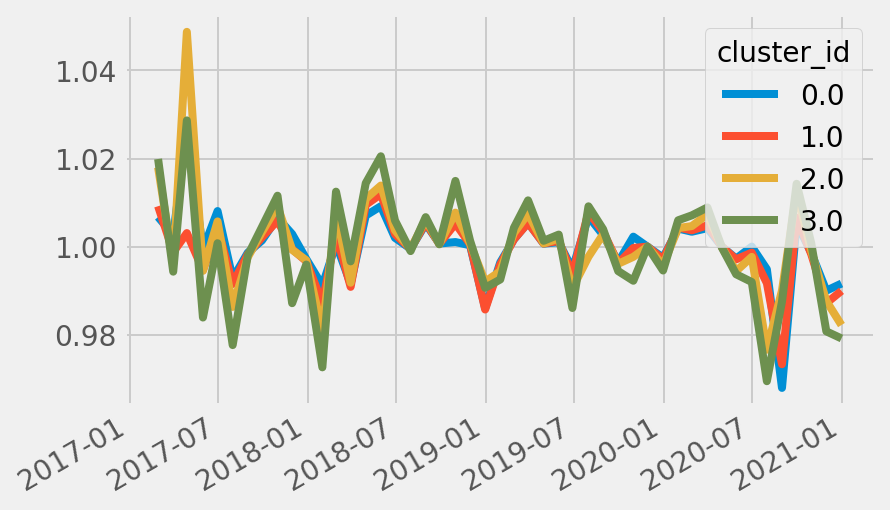

In [531]:
(1+(rem_compo.groupby(['cluster_id']).sum())).cumprod().T.plot()

In [525]:
(1+(rem_compo.groupby(['cluster_id']).sum())).cumprod().T.describe()

cluster_id,0.0,1.0,2.0,3.0
count,47.000000,47.000000,47.000000,47.000000
mean,1.000003,0.999251,1.000329,0.999346
std,0.007951,0.007137,0.011122,0.012542
min,0.967939,0.973313,0.976598,0.969462
25%,0.997250,0.996464,0.995143,0.992401
50%,1.000679,1.000000,0.999804,1.000530
75%,1.003741,1.004026,1.005194,1.006894
max,1.026510,1.011907,1.048740,1.028644


In [526]:
(1+(merge.groupby(['cluster_id']).sum())).cumprod().T.describe()

cluster_id,0,1,2,3
count,47.000000,47.000000,47.000000,47.000000
mean,1.000003,0.998881,1.000245,0.997816
std,0.007951,0.007786,0.012639,0.015052
min,0.967939,0.970556,0.973632,0.960508
25%,0.997250,0.996221,0.994884,0.990202
50%,1.000679,1.000000,1.000000,0.999697
75%,1.003741,1.003520,1.004574,1.006857
max,1.026510,1.011806,1.057878,1.024811


To replace the component currencies by its peers within same clusters.

My intuition starts from most simple strategy of holding

In [541]:
rem_compo.sort_values(by = 'cluster_id',ascending=False)
merge

,cluster_id,2017-02-28 00:00:00,2017-03-31 00:00:00,2017-04-28 00:00:00,2017-05-31 00:00:00,2017-06-30 00:00:00,2017-07-31 00:00:00,2017-08-31 00:00:00,2017-09-29 00:00:00,2017-10-31 00:00:00,...,2020-03-31 00:00:00,2020-04-30 00:00:00,2020-05-29 00:00:00,2020-06-30 00:00:00,2020-07-31 00:00:00,2020-08-31 00:00:00,2020-09-30 00:00:00,2020-10-30 00:00:00,2020-11-30 00:00:00,2020-12-31 00:00:00
eqw_SEK,3,-0.001698,-0.000821,-0.009577,-0.000964,-0.003743,-0.002376,-0.000223,0.000316,0.001048,...,0.000174,-0.000012,-0.000410,-0.000576,-0.002322,-0.000746,0.000758,0.000183,-0.001226,-0.001070
eqw_TWD,3,0.001435,-0.000666,-0.004491,-0.000128,0.001004,-0.000211,-0.000047,0.000133,-0.000220,...,-0.000025,-0.000009,0.000117,-0.000475,-0.000288,-0.000830,-0.000405,0.000578,0.000141,-0.000429
eqw_KRW,3,0.001873,-0.000860,0.010354,-0.000429,0.002345,-0.001111,-0.000009,0.000351,-0.000716,...,0.000043,-0.000007,0.000279,-0.000908,-0.000251,0.000371,-0.000433,0.001046,-0.000584,-0.000330
eqw_SGD,3,0.000653,-0.000331,-0.000327,-0.000638,-0.000616,-0.000895,0.000005,0.000010,0.000048,...,0.000096,-0.000006,0.000057,-0.000475,-0.000535,0.000606,0.000048,0.000044,-0.000547,-0.000241
eqw_MYR,3,-0.000144,-0.000188,-0.016899,-0.000948,0.000075,-0.000161,-0.000034,-0.000196,0.000079,...,0.000134,0.000002,0.000019,-0.000429,-0.000358,0.002344,-0.000099,0.000004,-0.000551,-0.000145
eqw_IDR,3,-0.000005,-0.000173,0.003500,-0.000193,-0.000365,0.000182,0.000014,0.000228,0.000178,...,0.000651,-0.000045,-0.000334,-0.000681,0.000038,0.000416,0.000881,0.000197,-0.001336,0.000018
eqw_THB,3,0.000618,-0.000598,0.002882,-0.001106,-0.000500,-0.001088,-0.000048,0.000089,-0.000191,...,0.000144,-0.000005,-0.000210,-0.000876,0.000475,0.000213,0.000262,0.000343,-0.000819,-0.000212
eqw_PHP,3,-0.000530,-0.000032,-0.004326,-0.000218,0.001726,0.000137,0.000128,-0.000094,0.000561,...,0.000039,-0.000013,0.000062,-0.000534,-0.000407,0.001782,-0.000079,-0.000014,-0.000144,-0.000006
eqw_NZD,3,-0.000950,0.001496,0.015617,-0.002301,-0.003618,-0.001613,0.000584,-0.000046,0.001805,...,0.000231,-0.000014,-0.000116,-0.001008,-0.001357,-0.001150,0.000185,0.000138,-0.001508,-0.000494
eqw_GBP,3,-0.000303,-0.000181,-0.028819,0.000530,-0.001841,-0.000587,0.000231,-0.000662,0.000601,...,0.000192,-0.000005,0.000151,0.000025,-0.002075,0.000918,0.000710,0.000161,-0.000785,-0.000387


In [480]:
# DXY components:
# Euro (EUR), 57.6% weight
# Japanese yen (JPY) 13.6% weight
# Pound sterling (GBP), 11.9% weight
# Canadian dollar (CAD), 9.1% weight
# Swedish krona (SEK), 4.2% weight
# Swiss franc (CHF) 3.6% weight

# SEK, EUR, GBP are in clusters 3 -- 57.6% + 11.9% +4.2%= 69.5%
# CAD is in cluster 2 -- 9.1%
# CHF, JPY are in cluster 1 -- sum of weights are 3.6+13.6 = 17.2%



# cumulative monthly return of 'replaced' =
#  0.172 * cumret of currencies from cluster 1 other than CHF and JPY
# + 0.091 * cumret of currencies from cluster 2 other than CAD
# + 0.695 * cumret of currencies from cluster 3 other than EUR, GBP, SEK

In [542]:
rem_compo.sort_values(by = 'cluster_id',ascending=False)

,cluster_id,2017-02-28 00:00:00,2017-03-31 00:00:00,2017-04-28 00:00:00,2017-05-31 00:00:00,2017-06-30 00:00:00,2017-07-31 00:00:00,2017-08-31 00:00:00,2017-09-29 00:00:00,2017-10-31 00:00:00,...,2020-03-31 00:00:00,2020-04-30 00:00:00,2020-05-29 00:00:00,2020-06-30 00:00:00,2020-07-31 00:00:00,2020-08-31 00:00:00,2020-09-30 00:00:00,2020-10-30 00:00:00,2020-11-30 00:00:00,2020-12-31 00:00:00
eqw_TWD,3.0,0.001435,-0.000666,-0.004491,-0.000128,0.001004,-0.000211,-0.000047,0.000133,-0.000220,...,-0.000025,-0.000009,0.000117,-0.000475,-0.000288,-0.000830,-0.000405,0.000578,0.000141,-0.000429
eqw_THB,3.0,0.000618,-0.000598,0.002882,-0.001106,-0.000500,-0.001088,-0.000048,0.000089,-0.000191,...,0.000144,-0.000005,-0.000210,-0.000876,0.000475,0.000213,0.000262,0.000343,-0.000819,-0.000212
eqw_SGD,3.0,0.000653,-0.000331,-0.000327,-0.000638,-0.000616,-0.000895,0.000005,0.000010,0.000048,...,0.000096,-0.000006,0.000057,-0.000475,-0.000535,0.000606,0.000048,0.000044,-0.000547,-0.000241
eqw_RON,3.0,-0.000941,-0.000087,-0.017860,-0.001591,-0.002867,-0.001617,-0.000064,0.000200,0.000361,...,0.000014,0.000011,-0.000217,-0.000432,-0.001847,-0.000908,0.000349,-0.000206,-0.000578,-0.000793
eqw_PHP,3.0,-0.000530,-0.000032,-0.004326,-0.000218,0.001726,0.000137,0.000128,-0.000094,0.000561,...,0.000039,-0.000013,0.000062,-0.000534,-0.000407,0.001782,-0.000079,-0.000014,-0.000144,-0.000006
eqw_HUF,3.0,-0.000119,-0.000279,-0.007611,-0.003110,-0.002108,-0.002407,-0.000111,0.000452,0.000433,...,0.000250,0.000001,-0.000390,0.000097,-0.002777,-0.005395,0.000883,-0.000383,-0.001055,-0.000459
eqw_IDR,3.0,-0.000005,-0.000173,0.003500,-0.000193,-0.000365,0.000182,0.000014,0.000228,0.000178,...,0.000651,-0.000045,-0.000334,-0.000681,0.000038,0.000416,0.000881,0.000197,-0.001336,0.000018
eqw_NZD,3.0,-0.000950,0.001496,0.015617,-0.002301,-0.003618,-0.001613,0.000584,-0.000046,0.001805,...,0.000231,-0.000014,-0.000116,-0.001008,-0.001357,-0.001150,0.000185,0.000138,-0.001508,-0.000494
eqw_MYR,3.0,-0.000144,-0.000188,-0.016899,-0.000948,0.000075,-0.000161,-0.000034,-0.000196,0.000079,...,0.000134,0.000002,0.000019,-0.000429,-0.000358,0.002344,-0.000099,0.000004,-0.000551,-0.000145
eqw_KRW,3.0,0.001873,-0.000860,0.010354,-0.000429,0.002345,-0.001111,-0.000009,0.000351,-0.000716,...,0.000043,-0.000007,0.000279,-0.000908,-0.000251,0.000371,-0.000433,0.001046,-0.000584,-0.000330


In [543]:
rem_compo.index

Index(['eqw_AG$', 'eqw_AU$', 'eqw_AUD', 'eqw_BRL', 'eqw_CLP', 'eqw_CNY',
       'eqw_COP', 'eqw_HUF', 'eqw_IDR', 'eqw_ILS', 'eqw_INR', 'eqw_KRW',
       'eqw_MXN', 'eqw_MYR', 'eqw_NOK', 'eqw_NZD', 'eqw_PHP', 'eqw_PLN',
       'eqw_RON', 'eqw_RUB', 'eqw_SGD', 'eqw_THB', 'eqw_TRY', 'eqw_TWD',
       'eqw_ZAR'],
      dtype='object')

In [544]:
# 4 clusters
#c4 = rem_compo.loc[rem_compo['cluster_id']==4]
c3 = rem_compo.loc[rem_compo['cluster_id']==3]
c2 = rem_compo.loc[rem_compo['cluster_id']==2]
c1 = rem_compo.loc[rem_compo['cluster_id']==1]
c0 = rem_compo.loc[rem_compo['cluster_id']==0]

c = [c3,c2, c1,c0]
w = [0.695,0.091,0.172,0]

<AxesSubplot:>

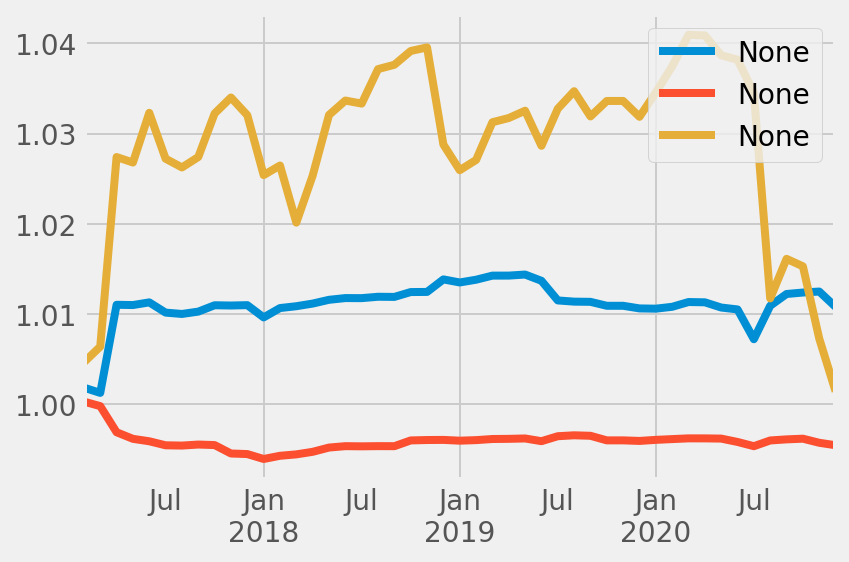

In [484]:
(1+(0.695*c3.iloc[:,1:].sum())).cumprod().T.plot(legend=True)
(1+(0.091*c2.iloc[:,1:].sum())).cumprod().T.plot(legend=True)
(1+(0.172*c1.iloc[:,1:].sum())).cumprod().T.plot(legend=True)

<AxesSubplot:>

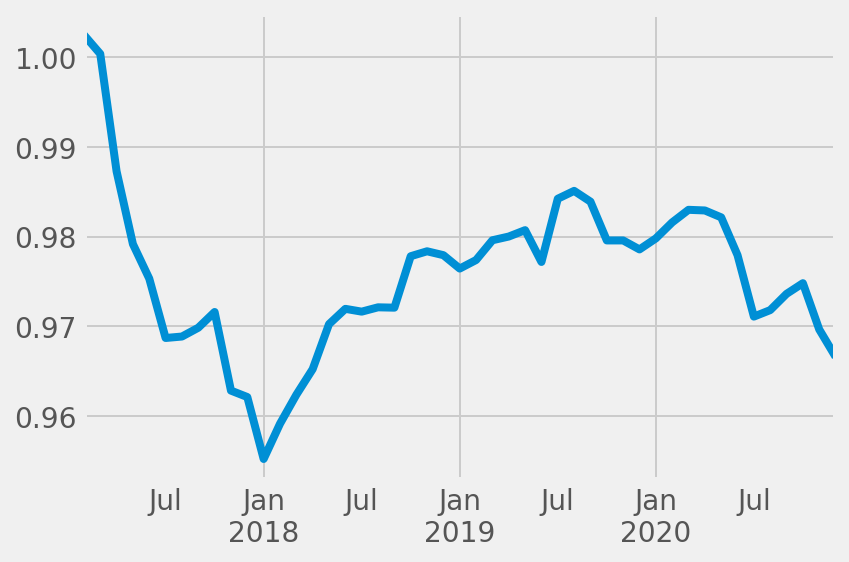

In [545]:
wc2 = 0.091*c2.iloc[:,1:].sum()
wc3 = 0.695*c3.iloc[:,1:].sum()
wc1 = 0.172*c1.iloc[:,1:].sum()
wcb = wc2 + wc3+ wc1
(1+wcb).cumprod().plot()

<AxesSubplot:>

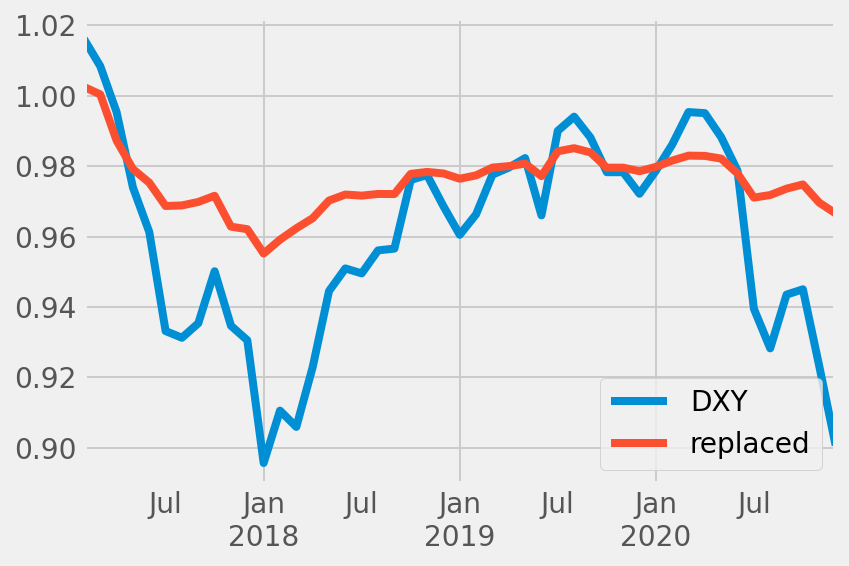

In [546]:
replaced = (1+wcb).cumprod()
replaced.name='replaced'
pd.concat([mon_cumret.iloc[1:,0],replaced],axis=1, names=['DXY', 'replaced']).plot()

Well, although the replacement does not offer us promising returns, the volatility has been decreased.
Besides, we can see that it seems to generate more returns by investing  in other currencies rather than DXY components,
which are basically currencies of developed economies.


## Plotting Clustering results

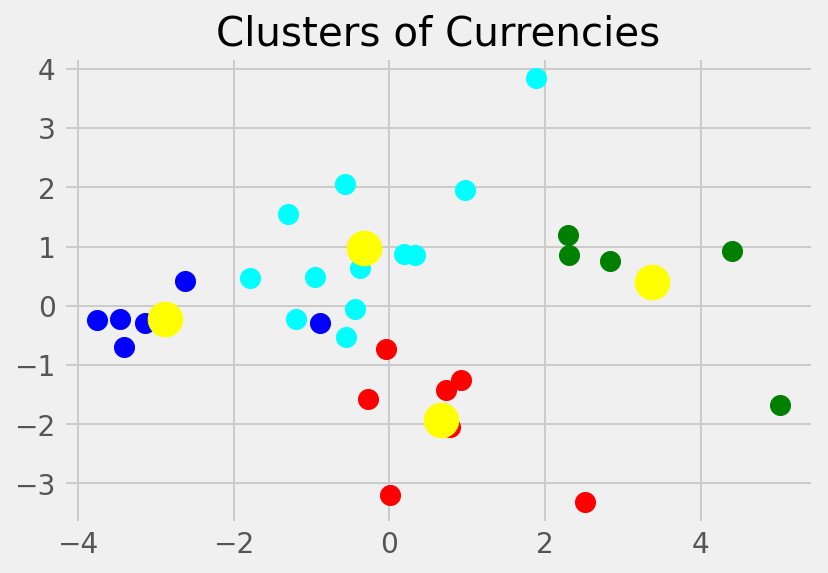

In [487]:
X = final_df.values
y_kmeans = kmeans.fit_predict(X)

#6 Visualising the clusters
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
#plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Currencies')
plt.xlabel('')
plt.ylabel('')
plt.show()

<AxesSubplot:xlabel='cluster_id', ylabel='PC1'>

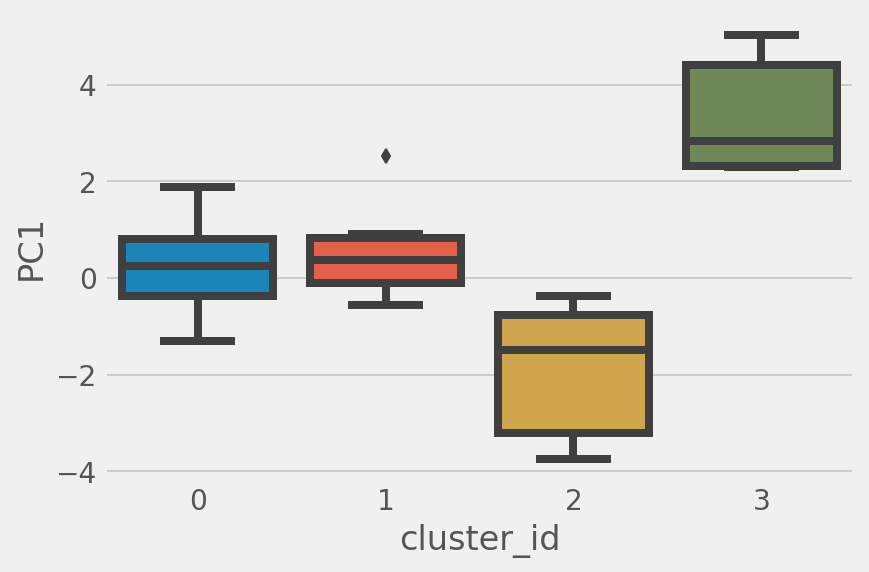

In [488]:
# plot clusters with respect to PC1 in Kmeans clustering
sns.boxplot(x='cluster_id', y='PC1', data=final_pca)

<AxesSubplot:xlabel='cluster_id', ylabel='PC2'>

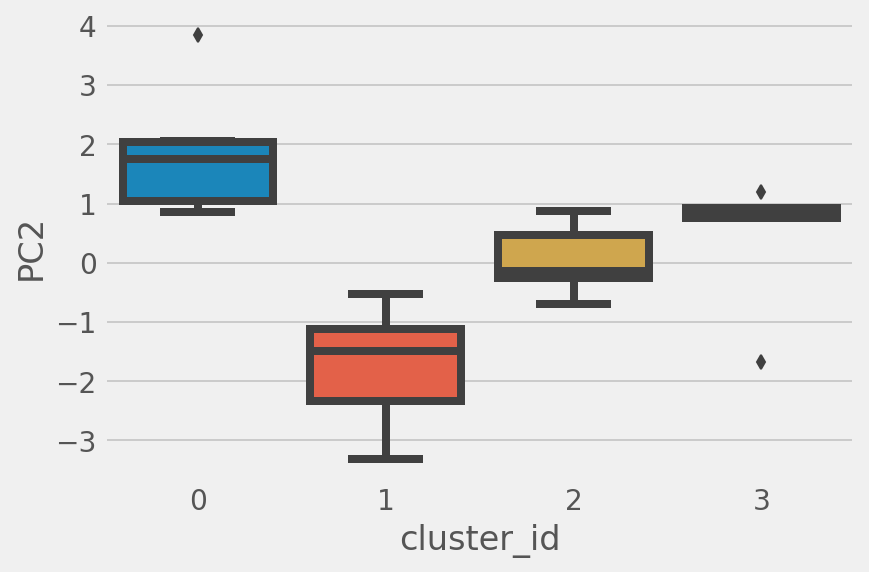

In [489]:
# plot clusters with respect to PC2 in Kmeans clustering
sns.boxplot(x='cluster_id', y='PC2', data=final_pca)

<AxesSubplot:xlabel='cluster_id', ylabel='PC4'>

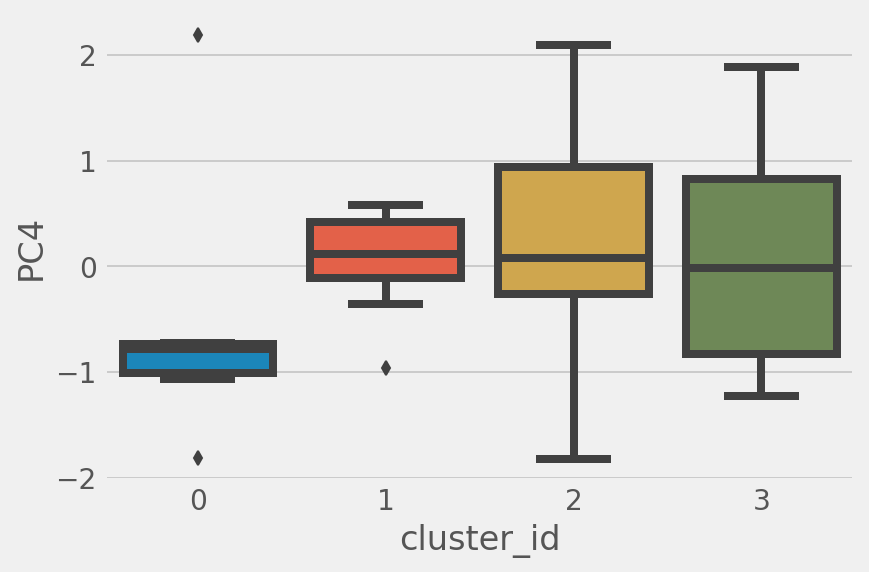

In [490]:
# plot clusters with respect to PC4 in Kmeans clustering
sns.boxplot(x='cluster_id', y='PC4', data=final_pca)

<AxesSubplot:xlabel='cluster_id', ylabel='PC5'>

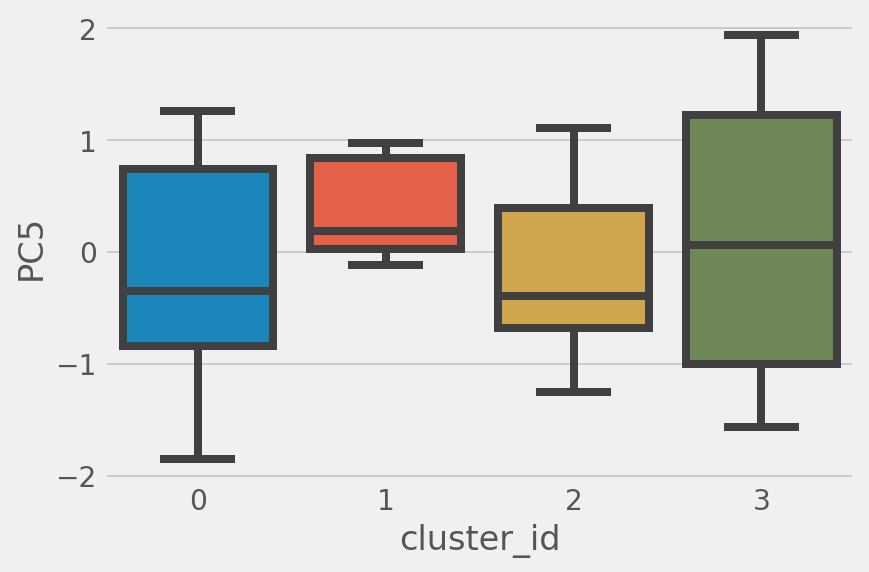

In [491]:
# plot clusters with respect to PC5 in Kmeans clustering
sns.boxplot(x='cluster_id', y='PC5', data=final_pca)


### Agglomerative Hierarchical Clustering

AHC:

The agglomerative clustering is the most common type of hierarchical clustering used to group objects in clusters based on their similarity.
The algorithm starts by treating each object as a singleton cluster.
Next, pairs of clusters are successively merged until all clusters have been merged into one big cluster containing all objects.
The result is a tree-based representation of the objects, named dendrogram.



Advantages:

- No need to set the number of clusters at the outset.
- The dendrogram provides useful visual information about cluster formation, which may help in data discovery.
- The hierarchical order may correspond to a meaningful taxonomy, such as geography, international trading etc.
- Works well with clusters of varying densities and spatial sizes.

Disadvantages:

- It can be difficult to identify the “correct” number of clusters, and domain expertise is usually required.
 1) Sensitivity to noise and outliers
 2) Breaking large clusters
 3) Difficulty handling different sized clusters and convex shapes
- Clusters formed in previous steps cannot be undone, which means no object swapping between clusters once assigned.
- Computationally heavy, which is a problem for large datasets.



Steps:

1. Preparing the data
2. Computing (dis)similarity information between every pair of objects in the data set.
3. Using linkage function to group objects into hierarchical cluster tree, based on the distance information generated at
step1. Objects/clusters that are in close proximity are linked together using the linkage function.
4. Determining where to cut the hierarchical tree into clusters. This creates a partition of the data.

In [493]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<ipython-input-494-ef275293bf51>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(X.corr(), dtype=np.bool)


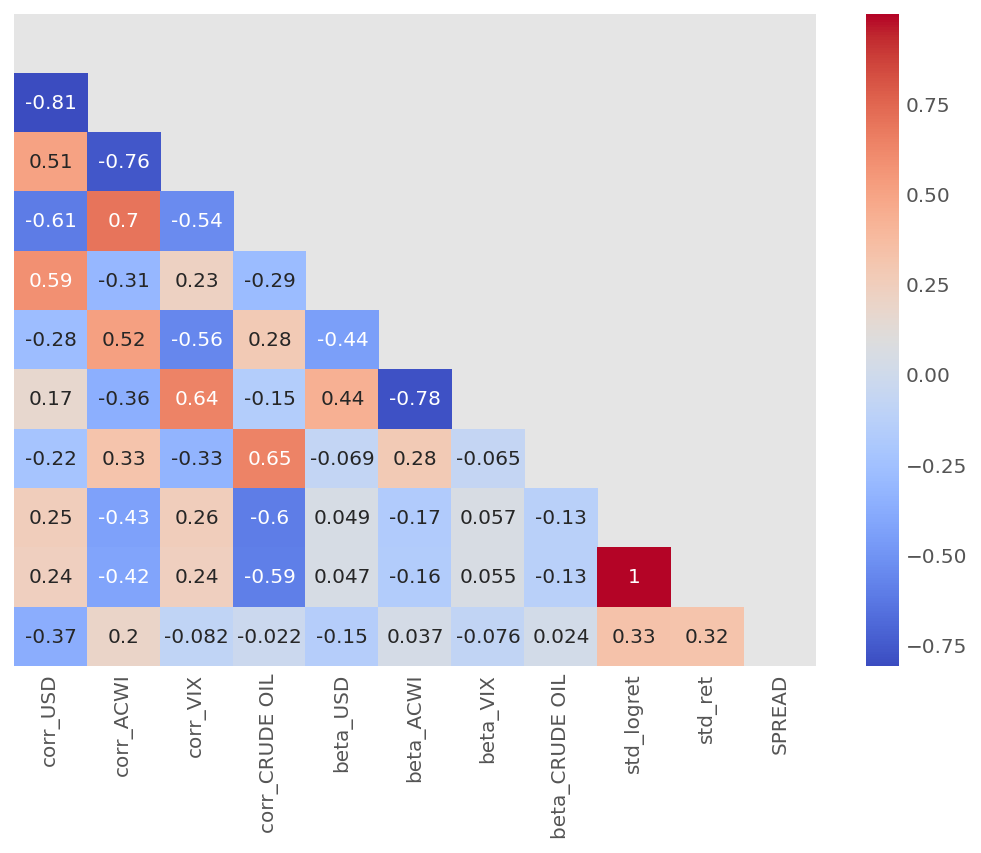

In [494]:
X = features

fig, ax = plt.subplots(figsize=(8, 6))

mask = np.zeros_like(X.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(X.corr(), mask=mask, annot=True, cmap='coolwarm', ax=ax)
ax.set_yticks(np.arange(0, df.shape[1])+0.1)
ax.set_ylim([X.shape[1], 0])
plt.show()

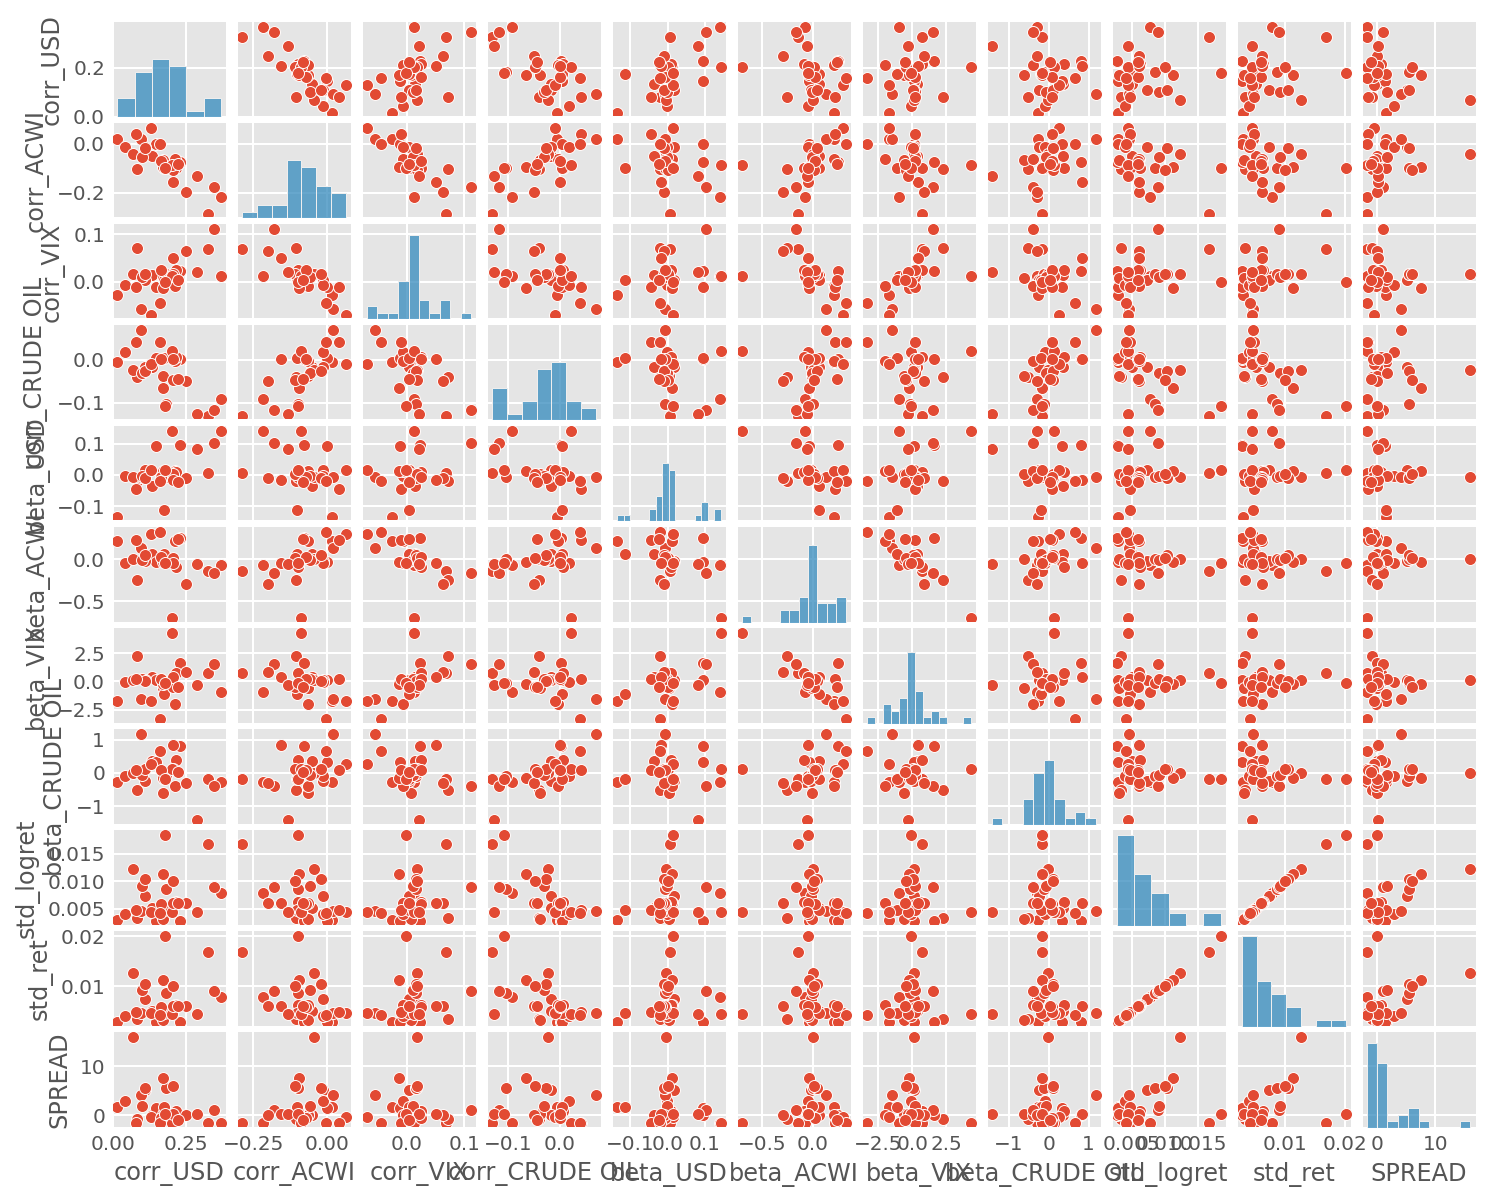

In [495]:
# Standardising the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Transformed the arrays of scaled values into a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

g=sns.pairplot(X)
g.fig.set_size_inches(10,8)
plt.show()


The AH algorithm utilizes various methodologies called “linkages” to calculate the distance between two clusters, and they can often produce rather different outcomes.
The Single linkage performs badly on noisy data, and since this is likely to be the case with financial market data, I will not utilize this particular method.

Next are three linkages and comparison outcomes.
- Complete
- Average
- Ward

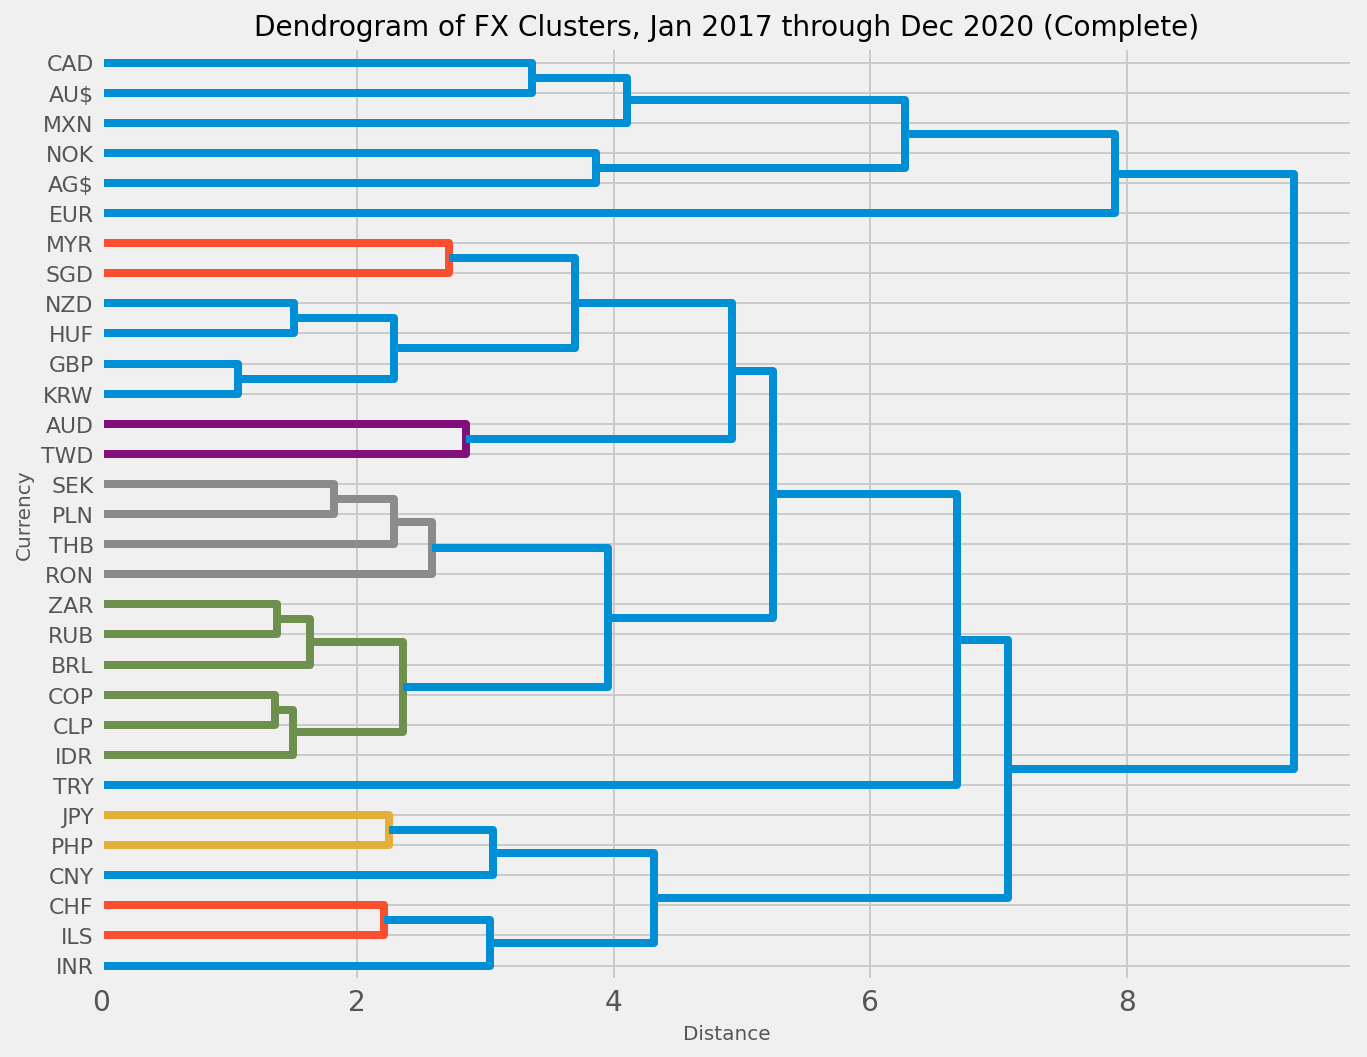

In [496]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

hier_comp = linkage(X_scaled, method='complete', metric='euclidean')

hier_average = linkage(X_scaled, method='average', metric='euclidean')

hier_ward = linkage(X_scaled, method='ward', metric='euclidean')

# Change the chart style...
plt.style.use('fivethirtyeight')

plt.figure(figsize=(10, 8))
plt.title('Dendrogram of FX Clusters, Jan 2017 through Dec 2020 (Complete)', fontsize=14)
plt.xlabel('Distance', fontsize=10)
plt.ylabel('Currency', fontsize=10)
dendrogram(
    hier_comp,
    orientation='right',
    #     leaf_rotation=90.,
    leaf_font_size=20,
    labels=X.index.values,
    color_threshold=3
)
plt.yticks(fontsize=11)
plt.show()

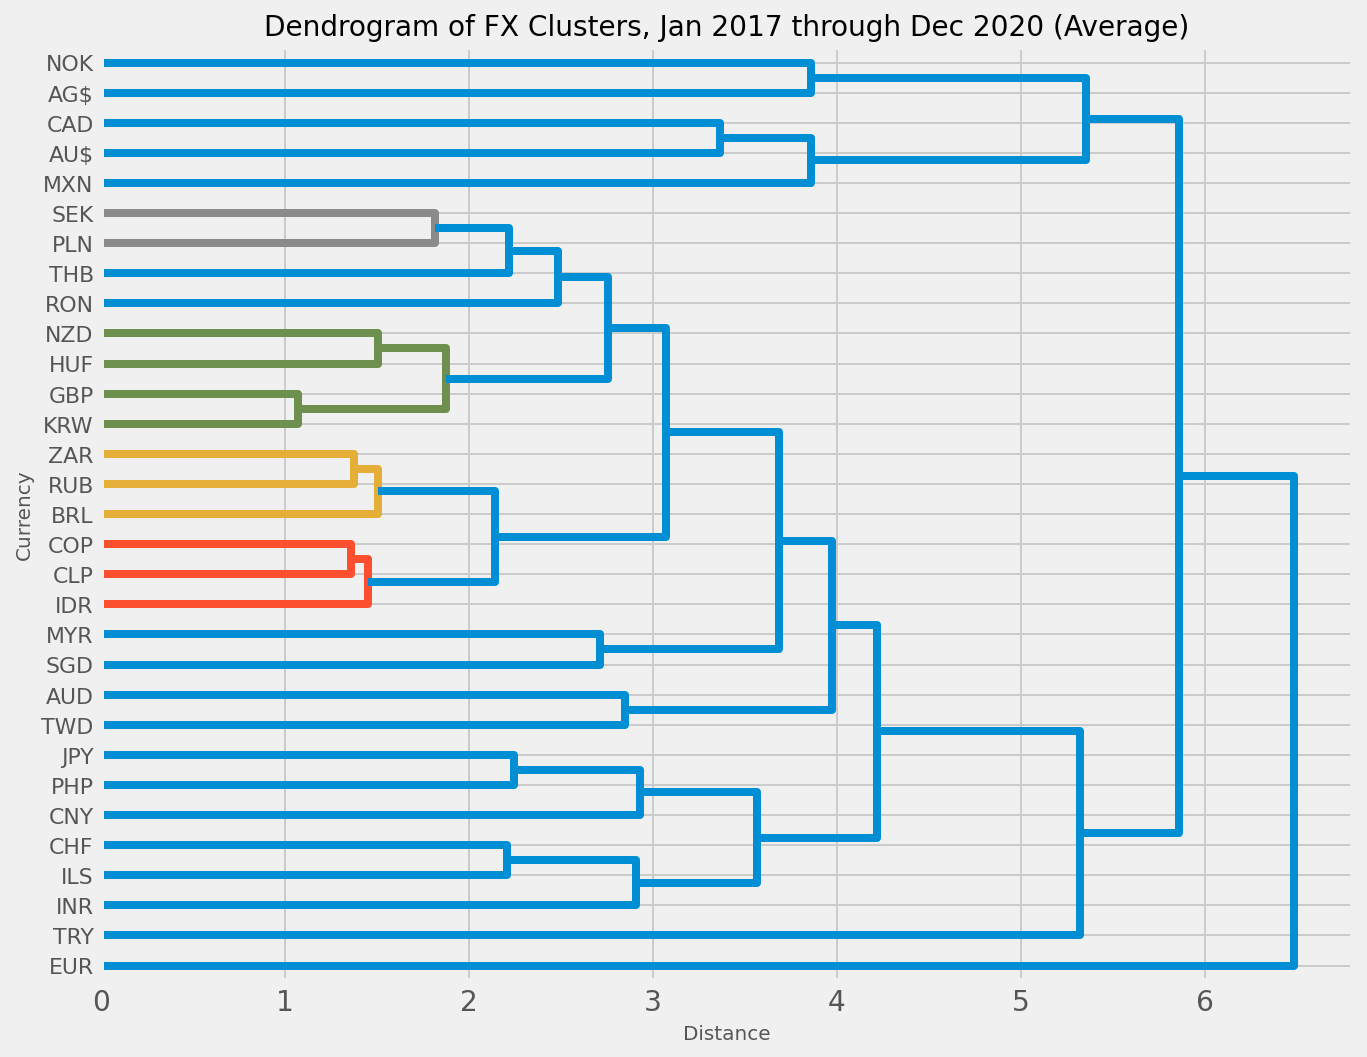

In [497]:
plt.figure(figsize=(10, 8))
plt.title('Dendrogram of FX Clusters, Jan 2017 through Dec 2020 (Average)', fontsize=14)
plt.xlabel('Distance', fontsize=10)
plt.ylabel('Currency', fontsize=10)
dendrogram(
    hier_average,
    orientation='right',
    #     leaf_rotation=90.,
    leaf_font_size=20,
    labels=X.index.values,
    color_threshold=2.0
)
plt.yticks(fontsize=11)
plt.show()


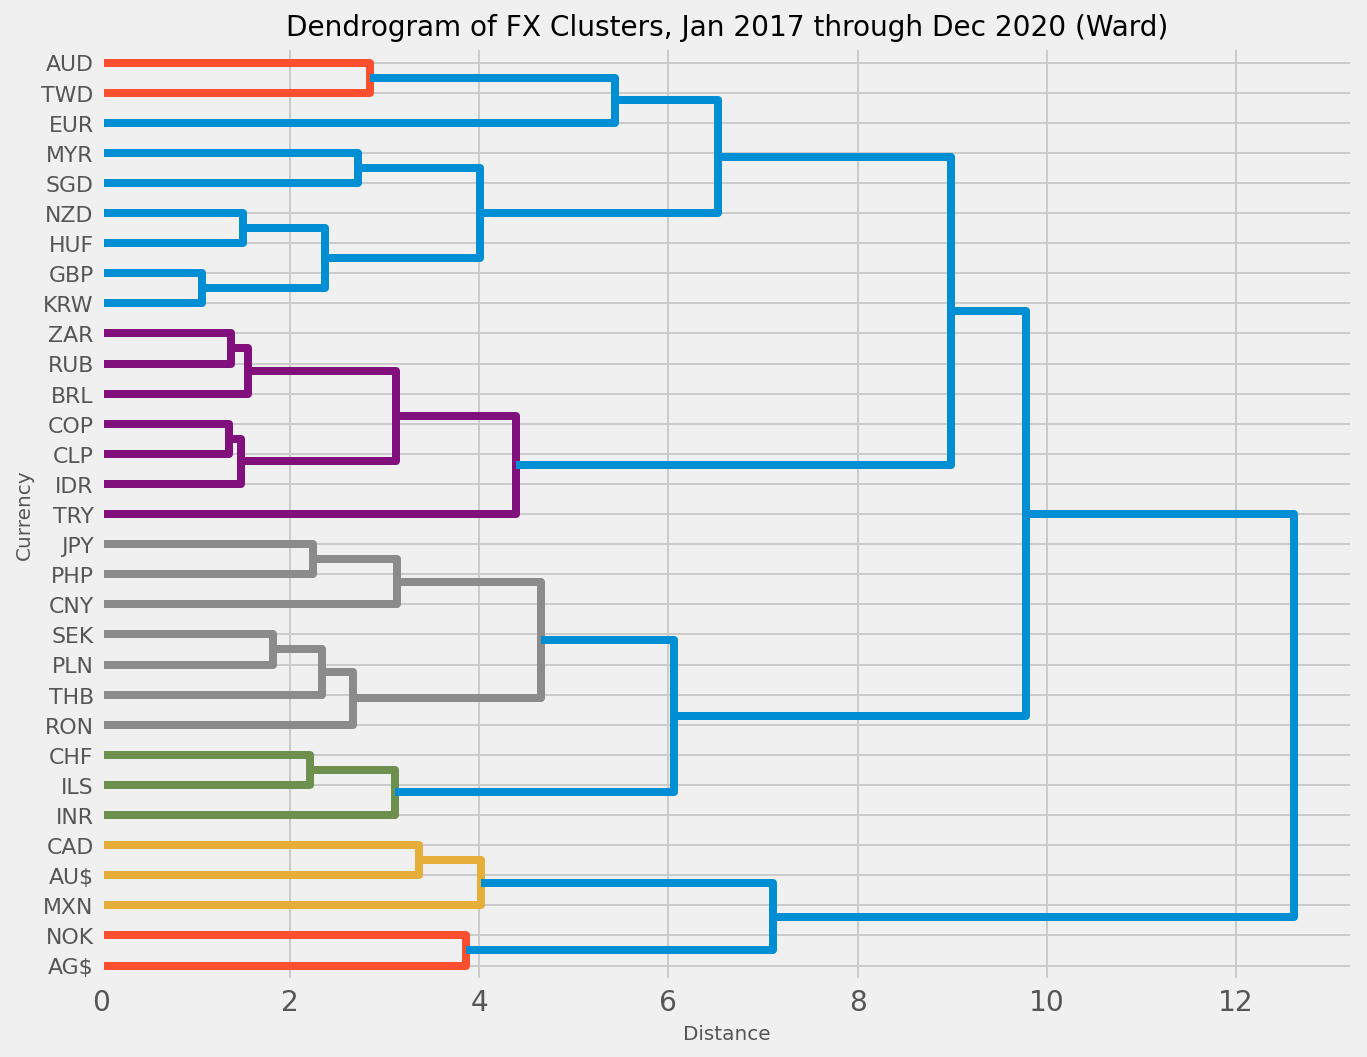

In [498]:
plt.figure(figsize=(10, 8))
plt.title('Dendrogram of FX Clusters, Jan 2017 through Dec 2020 (Ward)', fontsize=14)
plt.xlabel('Distance', fontsize=10)
plt.ylabel('Currency', fontsize=10)
dendrogram(
    hier_ward,
    orientation='right',
    #     leaf_rotation=90.,
    leaf_font_size=20,
    labels=X.index.values,
    color_threshold=5
)
plt.yticks(fontsize=11)
plt.show()

#### Clustering evaluation

*
In statistics, cophenetic correlation (more precisely, the cophenetic correlation coefficient) is a measure of how faithfully a dendrogram preserves the pairwise distances between the original unmodeled data points.

In any event, the Average Linkage has the best scores among the three, although all of them shows how unfitable this model is for this project.

In [499]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
hier_comp = linkage(X_scaled, method='complete', metric='euclidean')
c, coph_dists = cophenet(hier_comp, pdist(X, metric='euclidean'))
c

0.12763487140101384

In [500]:
hier_average = linkage(X_scaled, method='average', metric='euclidean')
c, coph_dists = cophenet(hier_average, pdist(X, metric='euclidean'))
c

0.22808043144174653

In [501]:
hier_ward = linkage(X_scaled, method='ward', metric='euclidean')
c, coph_dists = cophenet(hier_ward, pdist(X, metric='euclidean'))
c

0.12089090780264247

Cluster Evaluation (not sure about it, I think subjective adjustment based on experience of trading is required)

In [502]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Looks like k=4 gives the best Silhouette score
for k in range(2, 8):
    model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
    q = model.fit_predict(X_scaled)
    s = silhouette_score(X_scaled, q, metric='euclidean')
    print('{} number of clusters has Silhouette score of {:0.6f}'.format(k, s))


2 number of clusters has Silhouette score of 0.311760
3 number of clusters has Silhouette score of 0.300916
4 number of clusters has Silhouette score of 0.288217
5 number of clusters has Silhouette score of 0.227653
6 number of clusters has Silhouette score of 0.174189
7 number of clusters has Silhouette score of 0.167556


In [503]:
for k in range(2, 6):
    model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
    q = model.fit_predict(X_scaled)
    s = silhouette_score(X_scaled, q, metric='euclidean')
    print('{} number of clusters has Silhouette score of {:0.6f}'.format(k, s))

2 number of clusters has Silhouette score of 0.313388
3 number of clusters has Silhouette score of 0.300916
4 number of clusters has Silhouette score of 0.181358
5 number of clusters has Silhouette score of 0.156659


In [504]:
# Same when we use Average linkage
for k in range(2, 6):
    model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
    q = model.fit_predict(X_scaled)
    s = silhouette_score(X_scaled, q, metric='euclidean')
    print('{} number of clusters has Silhouette score of {:0.6f}'.format(k, s))

2 number of clusters has Silhouette score of 0.311760
3 number of clusters has Silhouette score of 0.300916
4 number of clusters has Silhouette score of 0.288217
5 number of clusters has Silhouette score of 0.227653


In [505]:
# Slightly different scores for the Ward linkage, due to the difference in results
for k in range(2, 6):
    model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    q = model.fit_predict(X_scaled)
    s = silhouette_score(X_scaled, q, metric='euclidean')
    print('{} number of clusters has Silhouette score of {:0.6f}'.format(k, s))


2 number of clusters has Silhouette score of 0.306550
3 number of clusters has Silhouette score of 0.150355
4 number of clusters has Silhouette score of 0.197272
5 number of clusters has Silhouette score of 0.215735


In [506]:
# So we set the AH algorithm with Complete linkage and 4 clusters
cluster_comp = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')

Reference:
https://github.com/at-tan/Hierarchical_Clustering_of_Currencies/blob/main/fx_clustering.ipynb

Materials:
Feature Selections
https://towardsdatascience.com/the-art-of-finding-the-best-features-for-machine-learning-a9074e2ca60d


